In [1]:
import sqlite3
import pandas as pd

In [2]:
# Connect to the databases
conn_mj = sqlite3.connect("../databases/michael_jordan_stats.db")
conn_lj = sqlite3.connect("../databases/lebron_james_stats.db")

In [3]:
# List all tables in the Michael Jordan database
tables_mj = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn_mj)
# print("Tables in Michael Jordan database:")
# print(tables_mj)



In [4]:
tables_mj

,name
0,per_game
1,playoffs_per_game
2,stathead_insights
3,totals
4,playoffs_totals
5,per_minute
6,playoffs_per_minute
7,per_poss
8,playoffs_per_poss
9,advanced


In [5]:
# List all tables in the LeBron James database
tables_lj = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn_lj)
# print("\nTables in LeBron James database:")
# print(tables_lj)

In [6]:
tables_lj

,name
0,last5
1,per_game
2,playoffs_per_game
3,stathead_insights
4,totals
5,playoffs_totals
6,per_minute
7,playoffs_per_minute
8,per_poss
9,playoffs_per_poss


In [67]:
# Iterate over the tables and print the data for each table
for table_name in tables_mj["name"]:
    print(f"Table: {table_name}")
    print("Michael Jordan Data:")
    df_mj = pd.read_sql_query(f'SELECT * FROM "{table_name}"', conn_mj)
    print(df_mj.head())
    
    print("LeBron James Data:")
    try:
        df_lj = pd.read_sql_query(f'SELECT * FROM "{table_name}"', conn_lj)
        print(df_lj.head())
    except pd.io.sql.DatabaseError:
        print("Table not found in LeBron James database.")
    
    print("\n")



Table: per_game
Michael Jordan Data:
    Season   Age   Tm   Lg Pos   G  GS    MP    FG   FGA  ...  ORB  DRB  TRB  \
0  1984-85  21.0  CHI  NBA  SG  82  82  38.3  10.2  19.8  ...  2.0  4.5  6.5   
1  1985-86  22.0  CHI  NBA  SG  18   7  25.1   8.3  18.2  ...  1.3  2.3  3.6   
2  1986-87  23.0  CHI  NBA  SG  82  82  40.0  13.4  27.8  ...  2.0  3.2  5.2   
3  1987-88  24.0  CHI  NBA  SG  82  82  40.4  13.0  24.4  ...  1.7  3.8  5.5   
4  1988-89  25.0  CHI  NBA  SG  81  81  40.2  11.9  22.2  ...  1.8  6.2  8.0   

   AST  STL  BLK  TOV   PF   PTS                     Awards  
0  5.9  2.4  0.8  3.5  3.5  28.2        MVP-6,NBA2,AS,ROY-1  
1  2.9  2.1  1.2  2.5  2.6  22.7                         AS  
2  4.6  2.9  1.5  3.3  2.9  37.1       MVP-2,NBA1,AS,DPOY-8  
3  5.9  3.2  1.6  3.1  3.3  35.0  MVP-1,NBA1,DEF1,AS,DPOY-1  
4  8.0  2.9  0.8  3.6  3.0  32.5  MVP-2,NBA1,DEF1,AS,DPOY-5  

[5 rows x 31 columns]
LeBron James Data:
    Season   Age   Tm   Lg Pos     G    GS    MP    FG   FGA  ...  O

In [68]:
# Retrieve data from the databases
query = "SELECT * FROM stathead_insights"
df_mj_stathead = pd.read_sql_query(query, conn_mj)
df_lj_stathead = pd.read_sql_query(query, conn_lj)

In [69]:
df_mj_stathead

,Highlight,Unnamed: 1,In Stathead
0,"Career high, Points",69.0,View full stats from top 20 games
1,"Career high, Rebounds",18.0,View full stats from top 20 games
2,"Career high, Assists",17.0,View full stats from top 20 games
3,"Career high, Steals",10.0,View full stats from top 20 games
4,"Career high, Blocks",6.0,View full stats from top 20 games
5,"Career high, Game Score",64.6,View full stats from top 20 games
6,Triple-Doubles,28.0,View all


In [70]:
df_lj_stathead

,Highlight,Unnamed: 1,In Stathead
0,"Career high, Points",61.0,View full stats from top 20 games
1,"Career high, Rebounds",20.0,View full stats from top 20 games
2,"Career high, Assists",19.0,View full stats from top 20 games
3,"Career high, Steals",7.0,View full stats from top 20 games
4,"Career high, Blocks",5.0,View full stats from top 20 games
5,"Career high, Game Score",53.2,View full stats from top 20 games
6,Triple-Doubles,110.0,View all


# Playoffs_advanced

In [71]:
query = "SELECT * FROM playoffs_advanced"
df_mj_playoffs_adv = pd.read_sql_query(query, conn_mj)
df_lj_playoffs_adv = pd.read_sql_query(query, conn_lj)

In [91]:
df_lj_playoffs_adv

,Season,Age,Tm,Lg,Pos,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,2005-06,21.0,CLE,NBA,SF,13.0,604.0,23.2,0.557,0.205,...,15.3,33.5,1.0,0.7,1.7,0.135,6.3,1.2,7.5,1.4
1,2006-07,22.0,CLE,NBA,SF,20.0,893.0,23.9,0.516,0.188,...,12.0,29.7,2.1,1.6,3.7,0.200,5.3,2.8,8.1,2.2
2,2007-08,23.0,CLE,NBA,SF,13.0,552.0,24.3,0.525,0.255,...,13.4,34.7,1.0,1.2,2.2,0.187,6.7,3.4,10.1,1.7
3,2008-09,24.0,CLE,NBA,SF,14.0,580.0,37.4,0.618,0.260,...,8.7,36.4,3.7,1.1,4.8,0.399,12.8,4.8,17.5,2.9
4,2009-10,25.0,CLE,NBA,SF,11.0,460.0,28.6,0.607,0.237,...,13.7,30.9,1.5,0.8,2.3,0.242,8.5,3.0,11.5,1.6
5,2010-11,26.0,MIA,NBA,SF,21.0,922.0,23.7,0.563,0.228,...,13.0,26.9,2.4,1.4,3.8,0.198,5.2,1.9,7.1,2.1
6,2011-12,27.0,MIA,NBA,SF,23.0,983.0,30.3,0.576,0.169,...,11.8,33.4,4.2,1.6,5.8,0.284,8.1,2.5,10.5,3.1
7,2012-13,28.0,MIA,NBA,PF,23.0,960.0,28.1,0.585,0.222,...,12.1,29.2,3.7,1.5,5.2,0.260,8.4,2.0,10.4,3.0
8,2013-14,29.0,MIA,NBA,PF,20.0,763.0,31.0,0.668,0.253,...,12.9,31.6,3.4,0.9,4.3,0.269,8.5,1.8,10.3,2.4
9,2014-15,30.0,CLE,NBA,SF,20.0,844.0,25.3,0.487,0.202,...,11.7,37.6,1.6,1.5,3.0,0.173,5.9,2.0,7.9,2.1


In [73]:
# List out all column names
df_lj_playoffs_adv.columns.tolist()

['Season',
 'Age',
 'Tm',
 'Lg',
 'Pos',
 'G',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'Unnamed: 19',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'Unnamed: 24',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP']

In [74]:
# remove row 17
df_lj_playoffs_adv = df_lj_playoffs_adv.drop([17])

In [75]:
# drop column 'Unnamed: 24', Unnamed: 19
df_lj_playoffs_adv = df_lj_playoffs_adv.drop(['Unnamed: 24', 'Unnamed: 19'], axis=1)

In [76]:
# drop rows 16 and above
df_lj_playoffs_adv = df_lj_playoffs_adv.drop(df_lj_playoffs_adv.index[16:])


In [90]:
df_mj_playoffs_adv

,Season,Age,Tm,Lg,Pos,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1984-85,21.0,CHI,NBA,SG,4.0,171.0,24.7,0.565,0.103,...,12.7,28.7,0.6,0.1,0.7,0.198,7.6,1.9,9.5,0.5
1,1985-86,22.0,CHI,NBA,SG,3.0,135.0,30.1,0.584,0.011,...,11.1,39.2,0.4,0.0,0.5,0.161,10.1,1.7,11.9,0.4
2,1986-87,23.0,CHI,NBA,SG,3.0,128.0,28.1,0.529,0.060,...,7.3,38.8,0.3,0.1,0.4,0.165,9.9,2.9,12.7,0.5
3,1987-88,24.0,CHI,NBA,SG,10.0,427.0,28.4,0.598,0.012,...,11.4,35.2,1.3,0.8,2.1,0.234,8.5,3.7,12.2,1.5
4,1988-89,25.0,CHI,NBA,SG,17.0,718.0,29.9,0.602,0.090,...,12.2,35.4,2.8,1.2,4.0,0.270,9.1,3.1,12.1,2.5
5,1989-90,26.0,CHI,NBA,SG,16.0,674.0,31.7,0.592,0.117,...,10.1,36.1,2.7,1.3,4.0,0.284,10.2,3.5,13.7,2.7
6,1990-91,27.0,CHI,NBA,SG,17.0,689.0,32.0,0.600,0.069,...,8.9,32.7,3.2,1.5,4.8,0.333,10.5,4.1,14.6,2.9
7,1991-92,28.0,CHI,NBA,SG,22.0,920.0,27.2,0.571,0.076,...,10.9,37.1,2.4,1.7,4.1,0.216,8.3,1.6,9.9,2.8
8,1992-93,29.0,CHI,NBA,SG,19.0,783.0,30.1,0.553,0.136,...,7.0,38.0,3.3,1.1,4.4,0.270,9.7,1.8,11.6,2.7
9,1994-95,31.0,CHI,NBA,SG,10.0,420.0,24.8,0.557,0.121,...,12.7,35.7,0.7,0.6,1.3,0.150,5.8,2.2,8.0,1.0


In [92]:
# List out all column names
df_lj_playoffs_adv.columns.tolist()

['Season',
 'Age',
 'Tm',
 'Lg',
 'Pos',
 'G',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP']

In [79]:
# drop column 'Unnamed: 24', Unnamed: 19
df_mj_playoffs_adv = df_mj_playoffs_adv.drop(['Unnamed: 24', 'Unnamed: 19'], axis=1)

In [80]:
# drop rows 13 above
df_mj_playoffs_adv = df_mj_playoffs_adv.drop(df_mj_playoffs_adv.index[13:])


In [96]:
# save file as parquet
df_mj_playoffs_adv.to_parquet('../data/mj_playoffs_adv.parquet')
df_lj_playoffs_adv.to_parquet('../data/lj_playoffs_adv.parquet')


# Per Game

In [102]:
# now clean per_game table
query = "SELECT * FROM per_game"
mj_per_game = pd.read_sql(query, conn_mj)
lj_per_game = pd.read_sql(query, conn_lj)


In [115]:
mj_per_game

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1984-85,21.0,CHI,NBA,SG,82,82,38.3,10.2,19.8,...,2.0,4.5,6.5,5.9,2.4,0.8,3.5,3.5,28.2,"MVP-6,NBA2,AS,ROY-1"
1,1985-86,22.0,CHI,NBA,SG,18,7,25.1,8.3,18.2,...,1.3,2.3,3.6,2.9,2.1,1.2,2.5,2.6,22.7,AS
2,1986-87,23.0,CHI,NBA,SG,82,82,40.0,13.4,27.8,...,2.0,3.2,5.2,4.6,2.9,1.5,3.3,2.9,37.1,"MVP-2,NBA1,AS,DPOY-8"
3,1987-88,24.0,CHI,NBA,SG,82,82,40.4,13.0,24.4,...,1.7,3.8,5.5,5.9,3.2,1.6,3.1,3.3,35.0,"MVP-1,NBA1,DEF1,AS,DPOY-1"
4,1988-89,25.0,CHI,NBA,SG,81,81,40.2,11.9,22.2,...,1.8,6.2,8.0,8.0,2.9,0.8,3.6,3.0,32.5,"MVP-2,NBA1,DEF1,AS,DPOY-5"
5,1989-90,26.0,CHI,NBA,SG,82,82,39.0,12.6,24.0,...,1.7,5.1,6.9,6.3,2.8,0.7,3.0,2.9,33.6,"MVP-3,NBA1,DEF1,AS,DPOY-5"
6,1990-91,27.0,CHI,NBA,SG,82,82,37.0,12.1,22.4,...,1.4,4.6,6.0,5.5,2.7,1.0,2.5,2.8,31.5,"MVP-1,NBA1,DEF1,AS,DPOY-7"
7,1991-92,28.0,CHI,NBA,SG,80,80,38.8,11.8,22.7,...,1.1,5.3,6.4,6.1,2.3,0.9,2.5,2.5,30.1,"MVP-1,NBA1,DEF1,AS,DPOY-3"
8,1992-93,29.0,CHI,NBA,SG,78,78,39.3,12.7,25.7,...,1.7,5.0,6.7,5.5,2.8,0.8,2.7,2.4,32.6,"MVP-3,NBA1,DEF1,AS,DPOY-2"
10,1994-95,31.0,CHI,NBA,SG,17,17,39.3,9.8,23.8,...,1.5,5.4,6.9,5.3,1.8,0.8,2.1,2.8,26.9,MVP-11


In [114]:
mj_per_game = mj_per_game[~mj_per_game.apply(lambda row: row.astype(str).str.contains('Did Not Play')).any(axis=1)]


In [104]:
# drop rows 19-22 
mj_per_game = mj_per_game.drop([19,20,21,22])

In [109]:
lj_per_game

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,2003-04,19.0,CLE,NBA,SG,79.0,79.0,39.5,7.9,18.9,...,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9,"MVP-9,ROY-1"
1,2004-05,20.0,CLE,NBA,SF,80.0,80.0,42.4,9.9,21.1,...,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2,"MVP-6,NBA2,AS,MIP-6"
2,2005-06,21.0,CLE,NBA,SF,79.0,79.0,42.5,11.1,23.1,...,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4,"MVP-2,NBA1,AS,MIP-19"
3,2006-07,22.0,CLE,NBA,SF,78.0,78.0,40.9,9.9,20.8,...,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3,"MVP-5,NBA2,AS"
4,2007-08,23.0,CLE,NBA,SF,75.0,74.0,40.4,10.6,21.9,...,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0,"MVP-4,NBA1,AS,MIP-18"
5,2008-09,24.0,CLE,NBA,SF,81.0,81.0,37.7,9.7,19.9,...,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7,28.4,"MVP-1,NBA1,DEF1,AS,DPOY-2"
6,2009-10,25.0,CLE,NBA,SF,76.0,76.0,39.0,10.1,20.1,...,0.9,6.4,7.3,8.6,1.6,1.0,3.4,1.6,29.7,"MVP-1,NBA1,DEF1,AS,DPOY-4"
7,2010-11,26.0,MIA,NBA,SF,79.0,79.0,38.8,9.6,18.8,...,1.0,6.5,7.5,7.0,1.6,0.6,3.6,2.1,26.7,"MVP-3,NBA1,DEF1,AS,DPOY-9"
8,2011-12,27.0,MIA,NBA,SF,62.0,62.0,37.5,10.0,18.9,...,1.5,6.4,7.9,6.2,1.9,0.8,3.4,1.5,27.1,"MVP-1,NBA1,DEF1,AS,DPOY-4"
9,2012-13,28.0,MIA,NBA,PF,76.0,76.0,37.9,10.1,17.8,...,1.3,6.8,8.0,7.3,1.7,0.9,3.0,1.4,26.8,"MVP-1,NBA1,DEF1,AS,DPOY-2"


In [107]:
# drop rows 21:25
lj_per_game = lj_per_game.drop(lj_per_game.index[21:26], axis=0)

In [117]:
mj_per_game.to_parquet('../data/mj_per_game.parquet')
lj_per_game.to_parquet('../data/lj_per_game.parquet')

# Adjusted Shooting

In [218]:
# select table adj_shooting
query = 'SELECT * FROM adj_shooting'
mj_adj_shooting = pd.read_sql(query, conn_mj)
lj_adj_shooting = pd.read_sql(query, conn_lj)


In [231]:
mj_adj_shooting

,Season,Age,Tm,Lg,Pos,G,MP,FG,2P,3P,...,FG+,2P+,3P+,eFG+,FT+,TS+,FTr+,3PAr+,FG Add,TS Add
0,1984-85,21.0,CHI,NBA,SG,82.0,3144.0,0.515,0.526,0.173,...,105.0,106.0,61.0,104.0,111.0,109.0,139.0,91.0,70.7,191.0
1,1985-86,22.0,CHI,NBA,SG,18.0,451.0,0.457,0.474,0.167,...,94.0,96.0,59.0,94.0,111.0,99.0,112.0,146.0,-20.2,-6.1
2,1986-87,23.0,CHI,NBA,SG,82.0,3281.0,0.482,0.491,0.182,...,100.0,100.0,60.0,99.0,112.0,104.0,124.0,54.0,-17.6,129.2
3,1987-88,24.0,CHI,NBA,SG,82.0,3311.0,0.535,0.546,0.132,...,111.0,111.0,42.0,110.0,110.0,112.0,130.0,47.0,189.5,311.4
4,1988-89,25.0,CHI,NBA,SG,81.0,3255.0,0.538,0.553,0.276,...,113.0,113.0,85.0,112.0,111.0,114.0,136.0,74.0,202.7,330.4
5,1989-90,26.0,CHI,NBA,SG,82.0,3197.0,0.526,0.548,0.376,...,111.0,112.0,114.0,112.0,111.0,113.0,109.0,165.0,239.7,315.1
6,1990-91,27.0,CHI,NBA,SG,82.0,3034.0,0.539,0.551,0.312,...,114.0,113.0,98.0,112.0,111.0,113.0,114.0,62.0,218.6,301.1
7,1991-92,28.0,CHI,NBA,SG,80.0,3102.0,0.519,0.533,0.270,...,110.0,110.0,82.0,108.0,110.0,109.0,106.0,63.0,142.6,196.0
8,1992-93,29.0,CHI,NBA,SG,78.0,3067.0,0.495,0.514,0.352,...,105.0,105.0,105.0,105.0,111.0,105.0,88.0,110.0,99.0,124.1
9,1994-95,31.0,CHI,NBA,SG,17.0,668.0,0.411,0.403,0.500,...,88.0,82.0,139.0,86.0,109.0,91.0,101.0,42.0,-55.9,-46.6


In [232]:
mj_adj_shooting.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'MP', 'FG', '2P', '3P', 'eFG',
       'FT', 'TS', 'FTr', '3PAr', 'FG', '2P', '3P', 'eFG', 'FT', 'TS', 'FTr',
       '3PAr', 'FG+', '2P+', '3P+', 'eFG+', 'FT+', 'TS+', 'FTr+', '3PAr+',
       'FG Add', 'TS Add'],
      dtype='object')

In [230]:
lj_adj_shooting

,Season,Age,Tm,Lg,Pos,G,MP,FG,2P,3P,...,FG+,2P+,3P+,eFG+,FT+,TS+,FTr+,3PAr+,FG Add,TS Add
0,2003-04,19.0,CLE,NBA,SG,79.0,3122.0,0.417,0.438,0.290,...,95.0,95.0,84.0,93.0,100.0,95.0,102.0,78.0,-98.7,-95.3
1,2004-05,20.0,CLE,NBA,SF,80.0,3388.0,0.472,0.499,0.351,...,105.0,106.0,99.0,105.0,99.0,105.0,116.0,93.0,73.5,95.7
2,2005-06,21.0,CLE,NBA,SF,79.0,3361.0,0.480,0.518,0.335,...,106.0,108.0,94.0,105.0,99.0,106.0,134.0,103.0,90.6,141.6
3,2006-07,22.0,CLE,NBA,SF,78.0,3190.0,0.476,0.513,0.319,...,104.0,106.0,89.0,102.0,93.0,102.0,132.0,90.0,33.8,42.6
4,2007-08,23.0,CLE,NBA,SF,75.0,3027.0,0.484,0.531,0.315,...,106.0,110.0,87.0,104.0,94.0,105.0,153.0,98.0,67.5,109.3
5,2008-09,24.0,CLE,NBA,SF,81.0,3054.0,0.489,0.535,0.344,...,107.0,110.0,94.0,106.0,101.0,109.0,155.0,106.0,97.7,182.8
6,2009-10,25.0,CLE,NBA,SF,76.0,2966.0,0.503,0.560,0.333,...,109.0,114.0,94.0,109.0,101.0,111.0,168.0,114.0,134.8,229.4
7,2010-11,26.0,MIA,NBA,SF,79.0,3063.0,0.510,0.552,0.330,...,111.0,113.0,92.0,109.0,99.0,110.0,149.0,85.0,127.9,187.1
8,2011-12,27.0,MIA,NBA,SF,62.0,2326.0,0.531,0.556,0.362,...,119.0,117.0,104.0,114.0,102.0,115.0,156.0,56.0,156.7,217.8
9,2012-13,28.0,MIA,NBA,PF,76.0,2877.0,0.565,0.602,0.406,...,125.0,125.0,113.0,121.0,100.0,120.0,146.0,77.0,288.7,336.6


In [229]:
mj_adj_shooting.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'MP', 'FG', '2P', '3P', 'eFG',
       'FT', 'TS', 'FTr', '3PAr', 'FG', '2P', '3P', 'eFG', 'FT', 'TS', 'FTr',
       '3PAr', 'FG+', '2P+', '3P+', 'eFG+', 'FT+', 'TS+', 'FTr+', '3PAr+',
       'FG Add', 'TS Add'],
      dtype='object')

In [228]:
# print column names
lj_adj_shooting.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'MP', 'FG', '2P', '3P', 'eFG',
       'FT', 'TS', 'FTr', '3PAr', 'FG', '2P', '3P', 'eFG', 'FT', 'TS', 'FTr',
       '3PAr', 'FG+', '2P+', '3P+', 'eFG+', 'FT+', 'TS+', 'FTr+', '3PAr+',
       'FG Add', 'TS Add'],
      dtype='object')

In [225]:
lj_adj_shooting.columns = [col.split("'")[-2] for col in lj_adj_shooting.columns]



In [226]:
mj_adj_shooting.columns = [col.split("'")[-2] for col in mj_adj_shooting.columns]

In [227]:
# drop column that contains Unnamed:
lj_adj_shooting = lj_adj_shooting.drop(lj_adj_shooting.columns[lj_adj_shooting.columns.str.contains('Unnamed',case = False)],axis = 1)
mj_adj_shooting = mj_adj_shooting.drop(mj_adj_shooting.columns[mj_adj_shooting.columns.str.contains('Unnamed',case = False)],axis = 1)

In [233]:
# check if mj adjshooting and lj version have the same columns
same_columns = mj_adj_shooting.columns.equals(lj_adj_shooting.columns)

if same_columns:
    print("The DataFrames have the same columns.")
else:
    print("The DataFrames have different columns.")


The DataFrames have the same columns.


In [234]:
# Remove rows from mj_adjshooting
mj_adj_shooting = mj_adj_shooting.iloc[:mj_adj_shooting[mj_adj_shooting['Season'] == 'Career'].index[0]]

# Remove rows from lj_adjshooting
lj_adj_shooting = lj_adj_shooting.iloc[:lj_adj_shooting[lj_adj_shooting['Season'] == 'Career'].index[0]]


In [235]:
# remove columns which arent 'FG+', '2P+', '3P+', 'eFG+', 'FT+', 'TS+', 'FTr+', '3PAr+','FG Add', 'TS Add'
mj_adj_shooting = mj_adj_shooting[['Season','FG+', '2P+', '3P+', 'eFG+', 'FT+', 'TS+', 'FTr+', '3PAr+','FG Add', 'TS Add']]
lj_adj_shooting = lj_adj_shooting[['Season','FG+', '2P+', '3P+', 'eFG+', 'FT+', 'TS+', 'FTr+', '3PAr+','FG Add', 'TS Add']]

In [236]:
lj_adj_shooting

,Season,FG+,2P+,3P+,eFG+,FT+,TS+,FTr+,3PAr+,FG Add,TS Add
0,2003-04,95.0,95.0,84.0,93.0,100.0,95.0,102.0,78.0,-98.7,-95.3
1,2004-05,105.0,106.0,99.0,105.0,99.0,105.0,116.0,93.0,73.5,95.7
2,2005-06,106.0,108.0,94.0,105.0,99.0,106.0,134.0,103.0,90.6,141.6
3,2006-07,104.0,106.0,89.0,102.0,93.0,102.0,132.0,90.0,33.8,42.6
4,2007-08,106.0,110.0,87.0,104.0,94.0,105.0,153.0,98.0,67.5,109.3
5,2008-09,107.0,110.0,94.0,106.0,101.0,109.0,155.0,106.0,97.7,182.8
6,2009-10,109.0,114.0,94.0,109.0,101.0,111.0,168.0,114.0,134.8,229.4
7,2010-11,111.0,113.0,92.0,109.0,99.0,110.0,149.0,85.0,127.9,187.1
8,2011-12,119.0,117.0,104.0,114.0,102.0,115.0,156.0,56.0,156.7,217.8
9,2012-13,125.0,125.0,113.0,121.0,100.0,120.0,146.0,77.0,288.7,336.6


In [237]:
mj_adj_shooting

,Season,FG+,2P+,3P+,eFG+,FT+,TS+,FTr+,3PAr+,FG Add,TS Add
0,1984-85,105.0,106.0,61.0,104.0,111.0,109.0,139.0,91.0,70.7,191.0
1,1985-86,94.0,96.0,59.0,94.0,111.0,99.0,112.0,146.0,-20.2,-6.1
2,1986-87,100.0,100.0,60.0,99.0,112.0,104.0,124.0,54.0,-17.6,129.2
3,1987-88,111.0,111.0,42.0,110.0,110.0,112.0,130.0,47.0,189.5,311.4
4,1988-89,113.0,113.0,85.0,112.0,111.0,114.0,136.0,74.0,202.7,330.4
5,1989-90,111.0,112.0,114.0,112.0,111.0,113.0,109.0,165.0,239.7,315.1
6,1990-91,114.0,113.0,98.0,112.0,111.0,113.0,114.0,62.0,218.6,301.1
7,1991-92,110.0,110.0,82.0,108.0,110.0,109.0,106.0,63.0,142.6,196.0
8,1992-93,105.0,105.0,105.0,105.0,111.0,105.0,88.0,110.0,99.0,124.1
9,1994-95,88.0,82.0,139.0,86.0,109.0,91.0,101.0,42.0,-55.9,-46.6


In [238]:
# save df's as parquet
lj_adj_shooting.to_parquet('../data/lj_adj_shooting.parquet')
mj_adj_shooting.to_parquet('../data/mj_adj_shooting.parquet')



# Playoffs Per Game

In [24]:
# select table playoffs_pergame
query = 'SELECT * FROM playoffs_per_game'
mj_playoff_per_game = pd.read_sql(query, conn_mj)
lj_playoff_per_game = pd.read_sql(query, conn_lj)


### MJ

In [25]:
mj_playoff_per_game

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1984-85,21.0,CHI,NBA,SG,4.0,4.0,42.8,8.5,19.5,...,0.828,1.8,4.0,5.8,8.5,2.8,1.0,3.8,3.8,29.3
1,1985-86,22.0,CHI,NBA,SG,3.0,3.0,45.0,16.0,31.7,...,0.872,1.7,4.7,6.3,5.7,2.3,1.3,4.7,4.3,43.7
2,1986-87,23.0,CHI,NBA,SG,3.0,3.0,42.7,11.7,28.0,...,0.897,2.3,4.7,7.0,6.0,2.0,2.3,2.7,3.7,35.7
3,1987-88,24.0,CHI,NBA,SG,10.0,10.0,42.7,13.8,26.0,...,0.869,2.3,4.8,7.1,4.7,2.4,1.1,3.9,3.8,36.3
4,1988-89,25.0,CHI,NBA,SG,17.0,17.0,42.2,11.7,22.9,...,0.799,1.5,5.5,7.0,7.6,2.5,0.8,4.0,3.8,34.8
5,1989-90,26.0,CHI,NBA,SG,16.0,16.0,42.1,13.7,26.6,...,0.836,1.5,5.7,7.2,6.8,2.8,0.9,3.5,3.4,36.7
6,1990-91,27.0,CHI,NBA,SG,17.0,17.0,40.5,11.6,22.1,...,0.845,1.1,5.3,6.4,8.4,2.4,1.4,2.5,3.1,31.1
7,1991-92,28.0,CHI,NBA,SG,22.0,22.0,41.8,13.2,26.4,...,0.857,1.7,4.5,6.2,5.8,2.0,0.7,3.7,2.8,34.5
8,1992-93,29.0,CHI,NBA,SG,19.0,19.0,41.2,13.2,27.8,...,0.805,1.7,5.1,6.7,6.0,2.1,0.9,2.4,3.1,35.1
9,1994-95,31.0,CHI,NBA,SG,10.0,10.0,42.0,12.0,24.8,...,0.810,2.0,4.5,6.5,4.5,2.3,1.4,4.1,3.0,31.5


In [26]:
mj_playoff_per_game = mj_playoff_per_game.loc[: mj_playoff_per_game[mj_playoff_per_game['Season'] == 'Career'].index[0] - 1]


In [27]:
mj_playoff_per_game

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1984-85,21.0,CHI,NBA,SG,4.0,4.0,42.8,8.5,19.5,...,0.828,1.8,4.0,5.8,8.5,2.8,1.0,3.8,3.8,29.3
1,1985-86,22.0,CHI,NBA,SG,3.0,3.0,45.0,16.0,31.7,...,0.872,1.7,4.7,6.3,5.7,2.3,1.3,4.7,4.3,43.7
2,1986-87,23.0,CHI,NBA,SG,3.0,3.0,42.7,11.7,28.0,...,0.897,2.3,4.7,7.0,6.0,2.0,2.3,2.7,3.7,35.7
3,1987-88,24.0,CHI,NBA,SG,10.0,10.0,42.7,13.8,26.0,...,0.869,2.3,4.8,7.1,4.7,2.4,1.1,3.9,3.8,36.3
4,1988-89,25.0,CHI,NBA,SG,17.0,17.0,42.2,11.7,22.9,...,0.799,1.5,5.5,7.0,7.6,2.5,0.8,4.0,3.8,34.8
5,1989-90,26.0,CHI,NBA,SG,16.0,16.0,42.1,13.7,26.6,...,0.836,1.5,5.7,7.2,6.8,2.8,0.9,3.5,3.4,36.7
6,1990-91,27.0,CHI,NBA,SG,17.0,17.0,40.5,11.6,22.1,...,0.845,1.1,5.3,6.4,8.4,2.4,1.4,2.5,3.1,31.1
7,1991-92,28.0,CHI,NBA,SG,22.0,22.0,41.8,13.2,26.4,...,0.857,1.7,4.5,6.2,5.8,2.0,0.7,3.7,2.8,34.5
8,1992-93,29.0,CHI,NBA,SG,19.0,19.0,41.2,13.2,27.8,...,0.805,1.7,5.1,6.7,6.0,2.1,0.9,2.4,3.1,35.1
9,1994-95,31.0,CHI,NBA,SG,10.0,10.0,42.0,12.0,24.8,...,0.810,2.0,4.5,6.5,4.5,2.3,1.4,4.1,3.0,31.5


In [28]:
mj_playoff_per_game.columns.tolist()


['Season',
 'Age',
 'Tm',
 'Lg',
 'Pos',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

## Lebron

In [29]:
lj_playoff_per_game

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2005-06,21.0,CLE,NBA,SF,13.0,13.0,46.5,11.2,23.6,...,0.737,1.7,6.4,8.1,5.8,1.4,0.7,5.0,3.4,30.8
1,2006-07,22.0,CLE,NBA,SF,20.0,20.0,44.7,8.3,20.0,...,0.755,1.3,6.8,8.1,8.0,1.7,0.5,3.3,2.0,25.1
2,2007-08,23.0,CLE,NBA,SF,13.0,13.0,42.5,8.7,21.2,...,0.731,1.2,6.6,7.8,7.6,1.8,1.3,4.2,2.5,28.2
3,2008-09,24.0,CLE,NBA,SF,14.0,14.0,41.4,11.4,22.3,...,0.749,1.4,7.8,9.1,7.3,1.6,0.9,2.7,2.1,35.3
4,2009-10,25.0,CLE,NBA,SF,11.0,11.0,41.8,9.6,19.2,...,0.733,1.4,7.9,9.3,7.6,1.7,1.8,3.8,2.1,29.1
5,2010-11,26.0,MIA,NBA,SF,21.0,21.0,43.9,8.3,17.8,...,0.763,1.6,6.8,8.4,5.9,1.7,1.2,3.1,2.7,23.7
6,2011-12,27.0,MIA,NBA,SF,23.0,23.0,42.7,10.9,21.8,...,0.739,2.3,7.4,9.7,5.6,1.9,0.7,3.5,2.0,30.3
7,2012-13,28.0,MIA,NBA,PF,23.0,23.0,41.7,9.2,18.8,...,0.777,1.6,6.8,8.4,6.6,1.8,0.8,3.0,1.9,25.9
8,2013-14,29.0,MIA,NBA,PF,20.0,20.0,38.2,9.6,17.0,...,0.806,0.7,6.4,7.1,4.8,1.8,0.6,3.1,2.3,27.4
9,2014-15,30.0,CLE,NBA,SF,20.0,20.0,42.2,11.4,27.2,...,0.731,1.9,9.5,11.3,8.5,1.7,1.1,4.1,2.9,30.1


In [30]:
lj_playoff_per_game = lj_playoff_per_game.loc[: lj_playoff_per_game[lj_playoff_per_game['Season'] == 'Career'].index[0] - 1]


In [31]:
lj_playoff_per_game

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2005-06,21.0,CLE,NBA,SF,13.0,13.0,46.5,11.2,23.6,...,0.737,1.7,6.4,8.1,5.8,1.4,0.7,5.0,3.4,30.8
1,2006-07,22.0,CLE,NBA,SF,20.0,20.0,44.7,8.3,20.0,...,0.755,1.3,6.8,8.1,8.0,1.7,0.5,3.3,2.0,25.1
2,2007-08,23.0,CLE,NBA,SF,13.0,13.0,42.5,8.7,21.2,...,0.731,1.2,6.6,7.8,7.6,1.8,1.3,4.2,2.5,28.2
3,2008-09,24.0,CLE,NBA,SF,14.0,14.0,41.4,11.4,22.3,...,0.749,1.4,7.8,9.1,7.3,1.6,0.9,2.7,2.1,35.3
4,2009-10,25.0,CLE,NBA,SF,11.0,11.0,41.8,9.6,19.2,...,0.733,1.4,7.9,9.3,7.6,1.7,1.8,3.8,2.1,29.1
5,2010-11,26.0,MIA,NBA,SF,21.0,21.0,43.9,8.3,17.8,...,0.763,1.6,6.8,8.4,5.9,1.7,1.2,3.1,2.7,23.7
6,2011-12,27.0,MIA,NBA,SF,23.0,23.0,42.7,10.9,21.8,...,0.739,2.3,7.4,9.7,5.6,1.9,0.7,3.5,2.0,30.3
7,2012-13,28.0,MIA,NBA,PF,23.0,23.0,41.7,9.2,18.8,...,0.777,1.6,6.8,8.4,6.6,1.8,0.8,3.0,1.9,25.9
8,2013-14,29.0,MIA,NBA,PF,20.0,20.0,38.2,9.6,17.0,...,0.806,0.7,6.4,7.1,4.8,1.8,0.6,3.1,2.3,27.4
9,2014-15,30.0,CLE,NBA,SF,20.0,20.0,42.2,11.4,27.2,...,0.731,1.9,9.5,11.3,8.5,1.7,1.1,4.1,2.9,30.1


In [33]:
mj_playoff_per_game.to_parquet('../data/mj_playoff_per_game.parquet')
lj_playoff_per_game.to_parquet('../data/lj_playoff_per_game.parquet')


# playoffs_totals

In [48]:
# select table playoffs_totals
query = 'SELECT * FROM playoffs_totals'
mj_playoffs_totals = pd.read_sql(query, conn_mj)
lj_playoffs_totals = pd.read_sql(query, conn_lj)


## MJ

In [49]:
mj_playoffs_totals = mj_playoffs_totals.loc[: mj_playoffs_totals[mj_playoffs_totals['Season'] == 'Career'].index[0] - 1]


In [50]:
mj_playoffs_totals

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 30,Trp-Dbl
0,1984-85,21.0,CHI,NBA,SG,4.0,4.0,171.0,34.0,78.0,...,16.0,23.0,34.0,11.0,4.0,15.0,15.0,117.0,None,0.0
1,1985-86,22.0,CHI,NBA,SG,3.0,3.0,135.0,48.0,95.0,...,14.0,19.0,17.0,7.0,4.0,14.0,13.0,131.0,None,0.0
2,1986-87,23.0,CHI,NBA,SG,3.0,3.0,128.0,35.0,84.0,...,14.0,21.0,18.0,6.0,7.0,8.0,11.0,107.0,None,0.0
3,1987-88,24.0,CHI,NBA,SG,10.0,10.0,427.0,138.0,260.0,...,48.0,71.0,47.0,24.0,11.0,39.0,38.0,363.0,None,0.0
4,1988-89,25.0,CHI,NBA,SG,17.0,17.0,718.0,199.0,390.0,...,93.0,119.0,130.0,42.0,13.0,68.0,65.0,591.0,None,1.0
5,1989-90,26.0,CHI,NBA,SG,16.0,16.0,674.0,219.0,426.0,...,91.0,115.0,109.0,45.0,14.0,56.0,54.0,587.0,None,0.0
6,1990-91,27.0,CHI,NBA,SG,17.0,17.0,689.0,197.0,376.0,...,90.0,108.0,142.0,40.0,23.0,43.0,53.0,529.0,None,0.0
7,1991-92,28.0,CHI,NBA,SG,22.0,22.0,920.0,290.0,581.0,...,100.0,137.0,127.0,44.0,16.0,81.0,62.0,759.0,None,0.0
8,1992-93,29.0,CHI,NBA,SG,19.0,19.0,783.0,251.0,528.0,...,96.0,128.0,114.0,39.0,17.0,45.0,58.0,666.0,None,1.0
9,1994-95,31.0,CHI,NBA,SG,10.0,10.0,420.0,120.0,248.0,...,45.0,65.0,45.0,23.0,14.0,41.0,30.0,315.0,None,0.0


In [51]:
# List out columns
mj_playoffs_totals.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Unnamed: 30', 'Trp-Dbl'],
      dtype='object')

In [52]:
# remove 'Unnamed: 30' column
mj_playoffs_totals = mj_playoffs_totals.drop('Unnamed: 30', axis=1)

In [53]:
mj_playoffs_totals

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl
0,1984-85,21.0,CHI,NBA,SG,4.0,4.0,171.0,34.0,78.0,...,7.0,16.0,23.0,34.0,11.0,4.0,15.0,15.0,117.0,0.0
1,1985-86,22.0,CHI,NBA,SG,3.0,3.0,135.0,48.0,95.0,...,5.0,14.0,19.0,17.0,7.0,4.0,14.0,13.0,131.0,0.0
2,1986-87,23.0,CHI,NBA,SG,3.0,3.0,128.0,35.0,84.0,...,7.0,14.0,21.0,18.0,6.0,7.0,8.0,11.0,107.0,0.0
3,1987-88,24.0,CHI,NBA,SG,10.0,10.0,427.0,138.0,260.0,...,23.0,48.0,71.0,47.0,24.0,11.0,39.0,38.0,363.0,0.0
4,1988-89,25.0,CHI,NBA,SG,17.0,17.0,718.0,199.0,390.0,...,26.0,93.0,119.0,130.0,42.0,13.0,68.0,65.0,591.0,1.0
5,1989-90,26.0,CHI,NBA,SG,16.0,16.0,674.0,219.0,426.0,...,24.0,91.0,115.0,109.0,45.0,14.0,56.0,54.0,587.0,0.0
6,1990-91,27.0,CHI,NBA,SG,17.0,17.0,689.0,197.0,376.0,...,18.0,90.0,108.0,142.0,40.0,23.0,43.0,53.0,529.0,0.0
7,1991-92,28.0,CHI,NBA,SG,22.0,22.0,920.0,290.0,581.0,...,37.0,100.0,137.0,127.0,44.0,16.0,81.0,62.0,759.0,0.0
8,1992-93,29.0,CHI,NBA,SG,19.0,19.0,783.0,251.0,528.0,...,32.0,96.0,128.0,114.0,39.0,17.0,45.0,58.0,666.0,1.0
9,1994-95,31.0,CHI,NBA,SG,10.0,10.0,420.0,120.0,248.0,...,20.0,45.0,65.0,45.0,23.0,14.0,41.0,30.0,315.0,0.0


## Lebron

In [54]:
# remove career and below for lj
lj_playoffs_totals = lj_playoffs_totals.loc[: lj_playoffs_totals[lj_playoffs_totals['Season'] == 'Career'].index[0] - 1]


In [55]:
lj_playoffs_totals

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 30,Trp-Dbl
0,2005-06,21.0,CLE,NBA,SF,13.0,13.0,604.0,146.0,307.0,...,83.0,105.0,76.0,18.0,9.0,65.0,44.0,400.0,None,2.0
1,2006-07,22.0,CLE,NBA,SF,20.0,20.0,893.0,166.0,399.0,...,135.0,161.0,159.0,34.0,10.0,66.0,40.0,501.0,None,0.0
2,2007-08,23.0,CLE,NBA,SF,13.0,13.0,552.0,113.0,275.0,...,86.0,102.0,99.0,23.0,17.0,54.0,33.0,366.0,None,1.0
3,2008-09,24.0,CLE,NBA,SF,14.0,14.0,580.0,159.0,312.0,...,109.0,128.0,102.0,23.0,12.0,38.0,30.0,494.0,None,1.0
4,2009-10,25.0,CLE,NBA,SF,11.0,11.0,460.0,106.0,211.0,...,87.0,102.0,84.0,19.0,20.0,42.0,23.0,320.0,None,2.0
5,2010-11,26.0,MIA,NBA,SF,21.0,21.0,922.0,174.0,373.0,...,142.0,176.0,123.0,35.0,25.0,66.0,56.0,497.0,None,1.0
6,2011-12,27.0,MIA,NBA,SF,23.0,23.0,983.0,251.0,502.0,...,170.0,224.0,129.0,43.0,16.0,81.0,47.0,697.0,None,1.0
7,2012-13,28.0,MIA,NBA,PF,23.0,23.0,960.0,212.0,432.0,...,156.0,193.0,152.0,41.0,18.0,70.0,43.0,596.0,None,3.0
8,2013-14,29.0,MIA,NBA,PF,20.0,20.0,763.0,192.0,340.0,...,127.0,141.0,95.0,36.0,11.0,61.0,46.0,548.0,None,0.0
9,2014-15,30.0,CLE,NBA,SF,20.0,20.0,844.0,227.0,544.0,...,189.0,226.0,169.0,33.0,21.0,82.0,58.0,601.0,None,3.0


In [56]:
# remove unamed column
lj_playoffs_totals = lj_playoffs_totals.drop('Unnamed: 30', axis=1)

In [57]:
lj_playoffs_totals

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl
0,2005-06,21.0,CLE,NBA,SF,13.0,13.0,604.0,146.0,307.0,...,22.0,83.0,105.0,76.0,18.0,9.0,65.0,44.0,400.0,2.0
1,2006-07,22.0,CLE,NBA,SF,20.0,20.0,893.0,166.0,399.0,...,26.0,135.0,161.0,159.0,34.0,10.0,66.0,40.0,501.0,0.0
2,2007-08,23.0,CLE,NBA,SF,13.0,13.0,552.0,113.0,275.0,...,16.0,86.0,102.0,99.0,23.0,17.0,54.0,33.0,366.0,1.0
3,2008-09,24.0,CLE,NBA,SF,14.0,14.0,580.0,159.0,312.0,...,19.0,109.0,128.0,102.0,23.0,12.0,38.0,30.0,494.0,1.0
4,2009-10,25.0,CLE,NBA,SF,11.0,11.0,460.0,106.0,211.0,...,15.0,87.0,102.0,84.0,19.0,20.0,42.0,23.0,320.0,2.0
5,2010-11,26.0,MIA,NBA,SF,21.0,21.0,922.0,174.0,373.0,...,34.0,142.0,176.0,123.0,35.0,25.0,66.0,56.0,497.0,1.0
6,2011-12,27.0,MIA,NBA,SF,23.0,23.0,983.0,251.0,502.0,...,54.0,170.0,224.0,129.0,43.0,16.0,81.0,47.0,697.0,1.0
7,2012-13,28.0,MIA,NBA,PF,23.0,23.0,960.0,212.0,432.0,...,37.0,156.0,193.0,152.0,41.0,18.0,70.0,43.0,596.0,3.0
8,2013-14,29.0,MIA,NBA,PF,20.0,20.0,763.0,192.0,340.0,...,14.0,127.0,141.0,95.0,36.0,11.0,61.0,46.0,548.0,0.0
9,2014-15,30.0,CLE,NBA,SF,20.0,20.0,844.0,227.0,544.0,...,37.0,189.0,226.0,169.0,33.0,21.0,82.0,58.0,601.0,3.0


In [58]:
# save as parquet
mj_playoffs_totals.to_parquet("../data/mj_playoffs_totals.parquet")
lj_playoffs_totals.to_parquet("../data/lj_playoffs_totals.parquet")


# per_minute

In [59]:
query = "SELECT * FROM per_minute"
mj_per_minute = pd.read_sql_query(query, conn_mj)
lj_per_minute = pd.read_sql_query(query, conn_lj)

## MJ

In [60]:
mj_per_minute

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1984-85,21.0,CHI,NBA,SG,82.0,82.0,3144.0,9.6,18.6,...,0.845,1.9,4.2,6.1,5.5,2.2,0.8,3.3,3.3,26.5
1,1985-86,22.0,CHI,NBA,SG,18.0,7.0,451.0,12.0,26.2,...,0.840,1.8,3.3,5.1,4.2,3.0,1.7,3.6,3.7,32.6
2,1986-87,23.0,CHI,NBA,SG,82.0,82.0,3281.0,12.0,25.0,...,0.857,1.8,2.9,4.7,4.1,2.6,1.4,3.0,2.6,33.4
3,1987-88,24.0,CHI,NBA,SG,82.0,82.0,3311.0,11.6,21.7,...,0.841,1.5,3.4,4.9,5.3,2.8,1.4,2.7,2.9,31.2
4,1988-89,25.0,CHI,NBA,SG,81.0,81.0,3255.0,10.7,19.9,...,0.850,1.6,5.6,7.2,7.2,2.6,0.7,3.2,2.7,29.1
5,1989-90,26.0,CHI,NBA,SG,82.0,82.0,3197.0,11.6,22.1,...,0.848,1.6,4.8,6.4,5.8,2.6,0.6,2.8,2.7,31.0
6,1990-91,27.0,CHI,NBA,SG,82.0,82.0,3034.0,11.7,21.8,...,0.851,1.4,4.4,5.8,5.4,2.6,1.0,2.4,2.7,30.6
7,1991-92,28.0,CHI,NBA,SG,80.0,80.0,3102.0,10.9,21.1,...,0.832,1.1,4.9,5.9,5.7,2.1,0.9,2.3,2.3,27.9
8,1992-93,29.0,CHI,NBA,SG,78.0,78.0,3067.0,11.6,23.5,...,0.837,1.6,4.5,6.1,5.0,2.6,0.7,2.4,2.2,29.8
9,1994-95,31.0,CHI,NBA,SG,17.0,17.0,668.0,8.9,21.8,...,0.801,1.3,5.0,6.3,4.9,1.6,0.7,1.9,2.5,24.6


In [61]:
mj_per_minute = mj_per_minute.loc[: mj_per_minute[mj_per_minute['Season'] == 'Career'].index[0] - 1]


In [62]:
mj_per_minute

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1984-85,21.0,CHI,NBA,SG,82.0,82.0,3144.0,9.6,18.6,...,0.845,1.9,4.2,6.1,5.5,2.2,0.8,3.3,3.3,26.5
1,1985-86,22.0,CHI,NBA,SG,18.0,7.0,451.0,12.0,26.2,...,0.840,1.8,3.3,5.1,4.2,3.0,1.7,3.6,3.7,32.6
2,1986-87,23.0,CHI,NBA,SG,82.0,82.0,3281.0,12.0,25.0,...,0.857,1.8,2.9,4.7,4.1,2.6,1.4,3.0,2.6,33.4
3,1987-88,24.0,CHI,NBA,SG,82.0,82.0,3311.0,11.6,21.7,...,0.841,1.5,3.4,4.9,5.3,2.8,1.4,2.7,2.9,31.2
4,1988-89,25.0,CHI,NBA,SG,81.0,81.0,3255.0,10.7,19.9,...,0.850,1.6,5.6,7.2,7.2,2.6,0.7,3.2,2.7,29.1
5,1989-90,26.0,CHI,NBA,SG,82.0,82.0,3197.0,11.6,22.1,...,0.848,1.6,4.8,6.4,5.8,2.6,0.6,2.8,2.7,31.0
6,1990-91,27.0,CHI,NBA,SG,82.0,82.0,3034.0,11.7,21.8,...,0.851,1.4,4.4,5.8,5.4,2.6,1.0,2.4,2.7,30.6
7,1991-92,28.0,CHI,NBA,SG,80.0,80.0,3102.0,10.9,21.1,...,0.832,1.1,4.9,5.9,5.7,2.1,0.9,2.3,2.3,27.9
8,1992-93,29.0,CHI,NBA,SG,78.0,78.0,3067.0,11.6,23.5,...,0.837,1.6,4.5,6.1,5.0,2.6,0.7,2.4,2.2,29.8
9,1994-95,31.0,CHI,NBA,SG,17.0,17.0,668.0,8.9,21.8,...,0.801,1.3,5.0,6.3,4.9,1.6,0.7,1.9,2.5,24.6


In [63]:
mj_per_minute.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

## Lebron

In [64]:
lj_per_minute = lj_per_minute.loc[: lj_per_minute[lj_per_minute['Season'] == 'Career'].index[0] - 1]

In [65]:
lj_per_minute

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2003-04,19.0,CLE,NBA,SG,79.0,79.0,3122.0,7.2,17.2,...,0.754,1.1,3.8,5.0,5.4,1.5,0.7,3.1,1.7,19.1
1,2004-05,20.0,CLE,NBA,SF,80.0,80.0,3388.0,8.4,17.9,...,0.750,1.2,5.1,6.2,6.1,1.9,0.6,2.8,1.6,23.1
2,2005-06,21.0,CLE,NBA,SF,79.0,79.0,3361.0,9.4,19.5,...,0.738,0.8,5.2,6.0,5.6,1.3,0.7,2.8,1.9,26.5
3,2006-07,22.0,CLE,NBA,SF,78.0,78.0,3190.0,8.7,18.3,...,0.698,0.9,5.0,5.9,5.3,1.4,0.6,2.8,1.9,24.1
4,2007-08,23.0,CLE,NBA,SF,75.0,74.0,3027.0,9.4,19.5,...,0.712,1.6,5.5,7.0,6.4,1.6,1.0,3.0,2.0,26.8
5,2008-09,24.0,CLE,NBA,SF,81.0,81.0,3054.0,9.3,19.0,...,0.780,1.2,6.0,7.2,6.9,1.6,1.1,2.8,1.6,27.2
6,2009-10,25.0,CLE,NBA,SF,76.0,76.0,2966.0,9.3,18.5,...,0.767,0.9,5.9,6.7,7.9,1.5,0.9,3.2,1.4,27.4
7,2010-11,26.0,MIA,NBA,SF,79.0,79.0,3063.0,8.9,17.5,...,0.759,0.9,6.0,6.9,6.5,1.5,0.6,3.3,1.9,24.8
8,2011-12,27.0,MIA,NBA,SF,62.0,62.0,2326.0,9.6,18.1,...,0.771,1.5,6.2,7.6,6.0,1.8,0.8,3.3,1.5,26.0
9,2012-13,28.0,MIA,NBA,PF,76.0,76.0,2877.0,9.6,16.9,...,0.753,1.2,6.4,7.6,6.9,1.6,0.8,2.8,1.4,25.5


In [66]:
lj_per_minute.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [ ]:
# save as parquet
mj_per_minute.to_parquet("../data/mj_per_minute.parquet")
lj_per_minute.to_parquet("../data/lj_per_minute.parquet")


# Playoffs per minute

In [3]:
query = "SELECT * FROM playoffs_per_minute"
mj_playoffs_per_minute = pd.read_sql_query(query, conn_mj)
lj_playoffs_per_minute = pd.read_sql_query(query, conn_lj)

## MJ

In [4]:
mj_playoffs_per_minute

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1984-85,21.0,CHI,NBA,SG,4.0,4.0,171.0,7.2,16.4,...,0.828,1.5,3.4,4.8,7.2,2.3,0.8,3.2,3.2,24.6
1,1985-86,22.0,CHI,NBA,SG,3.0,3.0,135.0,12.8,25.3,...,0.872,1.3,3.7,5.1,4.5,1.9,1.1,3.7,3.5,34.9
2,1986-87,23.0,CHI,NBA,SG,3.0,3.0,128.0,9.8,23.6,...,0.897,2.0,3.9,5.9,5.1,1.7,2.0,2.3,3.1,30.1
3,1987-88,24.0,CHI,NBA,SG,10.0,10.0,427.0,11.6,21.9,...,0.869,1.9,4.0,6.0,4.0,2.0,0.9,3.3,3.2,30.6
4,1988-89,25.0,CHI,NBA,SG,17.0,17.0,718.0,10.0,19.6,...,0.799,1.3,4.7,6.0,6.5,2.1,0.7,3.4,3.3,29.6
5,1989-90,26.0,CHI,NBA,SG,16.0,16.0,674.0,11.7,22.8,...,0.836,1.3,4.9,6.1,5.8,2.4,0.7,3.0,2.9,31.4
6,1990-91,27.0,CHI,NBA,SG,17.0,17.0,689.0,10.3,19.6,...,0.845,0.9,4.7,5.6,7.4,2.1,1.2,2.2,2.8,27.6
7,1991-92,28.0,CHI,NBA,SG,22.0,22.0,920.0,11.3,22.7,...,0.857,1.4,3.9,5.4,5.0,1.7,0.6,3.2,2.4,29.7
8,1992-93,29.0,CHI,NBA,SG,19.0,19.0,783.0,11.5,24.3,...,0.805,1.5,4.4,5.9,5.2,1.8,0.8,2.1,2.7,30.6
9,1994-95,31.0,CHI,NBA,SG,10.0,10.0,420.0,10.3,21.3,...,0.810,1.7,3.9,5.6,3.9,2.0,1.2,3.5,2.6,27.0


In [5]:
# removes careers and below
mj_playoffs_per_minute = mj_playoffs_per_minute.loc[: mj_playoffs_per_minute[mj_playoffs_per_minute['Season'] == 'Career'].index[0] - 1]

In [6]:
mj_playoffs_per_minute

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1984-85,21.0,CHI,NBA,SG,4.0,4.0,171.0,7.2,16.4,...,0.828,1.5,3.4,4.8,7.2,2.3,0.8,3.2,3.2,24.6
1,1985-86,22.0,CHI,NBA,SG,3.0,3.0,135.0,12.8,25.3,...,0.872,1.3,3.7,5.1,4.5,1.9,1.1,3.7,3.5,34.9
2,1986-87,23.0,CHI,NBA,SG,3.0,3.0,128.0,9.8,23.6,...,0.897,2.0,3.9,5.9,5.1,1.7,2.0,2.3,3.1,30.1
3,1987-88,24.0,CHI,NBA,SG,10.0,10.0,427.0,11.6,21.9,...,0.869,1.9,4.0,6.0,4.0,2.0,0.9,3.3,3.2,30.6
4,1988-89,25.0,CHI,NBA,SG,17.0,17.0,718.0,10.0,19.6,...,0.799,1.3,4.7,6.0,6.5,2.1,0.7,3.4,3.3,29.6
5,1989-90,26.0,CHI,NBA,SG,16.0,16.0,674.0,11.7,22.8,...,0.836,1.3,4.9,6.1,5.8,2.4,0.7,3.0,2.9,31.4
6,1990-91,27.0,CHI,NBA,SG,17.0,17.0,689.0,10.3,19.6,...,0.845,0.9,4.7,5.6,7.4,2.1,1.2,2.2,2.8,27.6
7,1991-92,28.0,CHI,NBA,SG,22.0,22.0,920.0,11.3,22.7,...,0.857,1.4,3.9,5.4,5.0,1.7,0.6,3.2,2.4,29.7
8,1992-93,29.0,CHI,NBA,SG,19.0,19.0,783.0,11.5,24.3,...,0.805,1.5,4.4,5.9,5.2,1.8,0.8,2.1,2.7,30.6
9,1994-95,31.0,CHI,NBA,SG,10.0,10.0,420.0,10.3,21.3,...,0.810,1.7,3.9,5.6,3.9,2.0,1.2,3.5,2.6,27.0


In [7]:
mj_playoffs_per_minute.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

## Lebron

In [8]:
lj_playoffs_per_minute

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2005-06,21.0,CLE,NBA,SF,13.0,13.0,604.0,8.7,18.3,...,0.737,1.3,4.9,6.3,4.5,1.1,0.5,3.9,2.6,23.8
1,2006-07,22.0,CLE,NBA,SF,20.0,20.0,893.0,6.7,16.1,...,0.755,1.0,5.4,6.5,6.4,1.4,0.4,2.7,1.6,20.2
2,2007-08,23.0,CLE,NBA,SF,13.0,13.0,552.0,7.4,17.9,...,0.731,1.0,5.6,6.7,6.5,1.5,1.1,3.5,2.2,23.9
3,2008-09,24.0,CLE,NBA,SF,14.0,14.0,580.0,9.9,19.4,...,0.749,1.2,6.8,7.9,6.3,1.4,0.7,2.4,1.9,30.7
4,2009-10,25.0,CLE,NBA,SF,11.0,11.0,460.0,8.3,16.5,...,0.733,1.2,6.8,8.0,6.6,1.5,1.6,3.3,1.8,25.0
5,2010-11,26.0,MIA,NBA,SF,21.0,21.0,922.0,6.8,14.6,...,0.763,1.3,5.5,6.9,4.8,1.4,1.0,2.6,2.2,19.4
6,2011-12,27.0,MIA,NBA,SF,23.0,23.0,983.0,9.2,18.4,...,0.739,2.0,6.2,8.2,4.7,1.6,0.6,3.0,1.7,25.5
7,2012-13,28.0,MIA,NBA,PF,23.0,23.0,960.0,7.9,16.2,...,0.777,1.4,5.9,7.2,5.7,1.5,0.7,2.6,1.6,22.3
8,2013-14,29.0,MIA,NBA,PF,20.0,20.0,763.0,9.1,16.0,...,0.806,0.7,6.0,6.7,4.5,1.7,0.5,2.9,2.2,25.9
9,2014-15,30.0,CLE,NBA,SF,20.0,20.0,844.0,9.7,23.2,...,0.731,1.6,8.1,9.6,7.2,1.4,0.9,3.5,2.5,25.6


In [9]:
lj_playoffs_per_minute = lj_playoffs_per_minute.loc[: lj_playoffs_per_minute[lj_playoffs_per_minute['Season'] == 'Career'].index[0] - 1]

In [10]:
lj_playoffs_per_minute

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2005-06,21.0,CLE,NBA,SF,13.0,13.0,604.0,8.7,18.3,...,0.737,1.3,4.9,6.3,4.5,1.1,0.5,3.9,2.6,23.8
1,2006-07,22.0,CLE,NBA,SF,20.0,20.0,893.0,6.7,16.1,...,0.755,1.0,5.4,6.5,6.4,1.4,0.4,2.7,1.6,20.2
2,2007-08,23.0,CLE,NBA,SF,13.0,13.0,552.0,7.4,17.9,...,0.731,1.0,5.6,6.7,6.5,1.5,1.1,3.5,2.2,23.9
3,2008-09,24.0,CLE,NBA,SF,14.0,14.0,580.0,9.9,19.4,...,0.749,1.2,6.8,7.9,6.3,1.4,0.7,2.4,1.9,30.7
4,2009-10,25.0,CLE,NBA,SF,11.0,11.0,460.0,8.3,16.5,...,0.733,1.2,6.8,8.0,6.6,1.5,1.6,3.3,1.8,25.0
5,2010-11,26.0,MIA,NBA,SF,21.0,21.0,922.0,6.8,14.6,...,0.763,1.3,5.5,6.9,4.8,1.4,1.0,2.6,2.2,19.4
6,2011-12,27.0,MIA,NBA,SF,23.0,23.0,983.0,9.2,18.4,...,0.739,2.0,6.2,8.2,4.7,1.6,0.6,3.0,1.7,25.5
7,2012-13,28.0,MIA,NBA,PF,23.0,23.0,960.0,7.9,16.2,...,0.777,1.4,5.9,7.2,5.7,1.5,0.7,2.6,1.6,22.3
8,2013-14,29.0,MIA,NBA,PF,20.0,20.0,763.0,9.1,16.0,...,0.806,0.7,6.0,6.7,4.5,1.7,0.5,2.9,2.2,25.9
9,2014-15,30.0,CLE,NBA,SF,20.0,20.0,844.0,9.7,23.2,...,0.731,1.6,8.1,9.6,7.2,1.4,0.9,3.5,2.5,25.6


In [11]:
# save as parquet file
mj_playoffs_per_minute.to_parquet("../data/mj_playoffs_per_minute.parquet")
lj_playoffs_per_minute.to_parquet("../data/lj_playoffs_per_minute.parquet")


# per_poss

In [13]:
query = "SELECT * FROM per_poss"
mj_per_poss = pd.read_sql_query(query, conn_mj)
lj_per_poss = pd.read_sql_query(query, conn_lj)


In [14]:
mj_per_poss

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 29,ORtg,DRtg
0,1984-85,21.0,CHI,NBA,SG,82.0,82.0,3144.0,12.9,25.0,...,8.2,7.4,3.0,1.1,4.5,4.4,35.5,None,118.0,107.0
1,1985-86,22.0,CHI,NBA,SG,18.0,7.0,451.0,16.0,35.0,...,6.8,5.7,3.9,2.2,4.8,4.9,43.5,None,109.0,107.0
2,1986-87,23.0,CHI,NBA,SG,82.0,82.0,3281.0,16.8,34.8,...,6.6,5.8,3.6,1.9,4.2,3.6,46.4,None,117.0,104.0
3,1987-88,24.0,CHI,NBA,SG,82.0,82.0,3311.0,16.2,30.3,...,6.8,7.4,3.9,2.0,3.8,4.1,43.6,None,123.0,101.0
4,1988-89,25.0,CHI,NBA,SG,81.0,81.0,3255.0,14.7,27.3,...,9.9,9.9,3.6,1.0,4.4,3.8,40.0,None,123.0,103.0
5,1989-90,26.0,CHI,NBA,SG,82.0,82.0,3197.0,16.0,30.5,...,8.8,8.1,3.5,0.8,3.8,3.7,42.7,None,123.0,106.0
6,1990-91,27.0,CHI,NBA,SG,82.0,82.0,3034.0,16.4,30.4,...,8.1,7.5,3.7,1.4,3.3,3.8,42.7,None,125.0,102.0
7,1991-92,28.0,CHI,NBA,SG,80.0,80.0,3102.0,15.5,29.8,...,8.4,8.0,3.0,1.2,3.3,3.3,39.4,None,121.0,102.0
8,1992-93,29.0,CHI,NBA,SG,78.0,78.0,3067.0,16.8,33.9,...,8.8,7.2,3.7,1.0,3.5,3.2,43.0,None,119.0,102.0
9,1994-95,31.0,CHI,NBA,SG,17.0,17.0,668.0,13.0,31.5,...,9.1,7.0,2.3,1.0,2.7,3.7,35.7,None,109.0,103.0


In [15]:
lj_per_poss

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 29,ORtg,DRtg
0,2003-04,19.0,CLE,NBA,SG,79.0,79.0,3122.0,10.5,25.3,...,7.3,7.9,2.2,1.0,4.6,2.5,28.0,None,99.0,104.0
1,2004-05,20.0,CLE,NBA,SF,80.0,80.0,3388.0,12.6,26.6,...,9.3,9.1,2.8,0.8,4.1,2.3,34.3,None,114.0,103.0
2,2005-06,21.0,CLE,NBA,SF,79.0,79.0,3361.0,13.9,29.0,...,8.8,8.3,2.0,1.0,4.1,2.9,39.4,None,115.0,104.0
3,2006-07,22.0,CLE,NBA,SF,78.0,78.0,3190.0,12.8,26.9,...,8.7,7.8,2.1,0.9,4.1,2.8,35.3,None,112.0,100.0
4,2007-08,23.0,CLE,NBA,SF,75.0,74.0,3027.0,14.0,28.9,...,10.4,9.5,2.4,1.4,4.5,2.9,39.6,None,116.0,104.0
5,2008-09,24.0,CLE,NBA,SF,81.0,81.0,3054.0,14.0,28.6,...,10.9,10.4,2.4,1.6,4.3,2.5,40.8,None,122.0,99.0
6,2009-10,25.0,CLE,NBA,SF,76.0,76.0,2966.0,13.6,27.1,...,9.8,11.5,2.2,1.4,4.6,2.1,40.0,None,121.0,102.0
7,2010-11,26.0,MIA,NBA,SF,79.0,79.0,3063.0,13.1,25.6,...,10.2,9.6,2.1,0.9,4.9,2.8,36.4,None,116.0,102.0
8,2011-12,27.0,MIA,NBA,SF,62.0,62.0,2326.0,14.1,26.4,...,11.1,8.8,2.6,1.1,4.8,2.2,38.1,None,118.0,97.0
9,2012-13,28.0,MIA,NBA,PF,76.0,76.0,2877.0,14.1,24.9,...,11.2,10.1,2.4,1.2,4.2,2.0,37.5,None,125.0,101.0


In [16]:
# remove career and below
mj_per_poss = mj_per_poss.loc[: mj_per_poss[mj_per_poss['Season'] == 'Career'].index[0] - 1]
lj_per_poss = lj_per_poss.loc[: lj_per_poss[lj_per_poss['Season'] == 'Career'].index[0] - 1]


In [17]:
lj_per_poss.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Unnamed: 29',
       'ORtg', 'DRtg'],
      dtype='object')

In [18]:
mj_per_poss.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Unnamed: 29',
       'ORtg', 'DRtg'],
      dtype='object')

In [19]:
# remove the unamed column in both df's
mj_per_poss = mj_per_poss.drop('Unnamed: 29', axis=1)
lj_per_poss = lj_per_poss.drop('Unnamed: 29', axis=1)



In [21]:
lj_per_poss.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'ORtg', 'DRtg'],
      dtype='object')

In [22]:
mj_per_poss.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'ORtg', 'DRtg'],
      dtype='object')

In [23]:
# save as parquet file
mj_per_poss.to_parquet("../data/mj_per_poss.parquet")
lj_per_poss.to_parquet("../data/lj_per_poss.parquet")



# playoffs_per_poss

In [24]:
query = "SELECT * FROM playoffs_per_poss"
mj_playoffs_per_poss = pd.read_sql_query(query, conn_mj)
lj_playoffs_per_poss = pd.read_sql_query(query, conn_lj)




In [25]:
mj_playoffs_per_poss

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 29,ORtg,DRtg
0,1984-85,21.0,CHI,NBA,SG,4.0,4.0,171.0,9.8,22.5,...,6.6,9.8,3.2,1.2,4.3,4.3,33.8,None,120.0,112.0
1,1985-86,22.0,CHI,NBA,SG,3.0,3.0,135.0,17.4,34.5,...,6.9,6.2,2.5,1.5,5.1,4.7,47.6,None,116.0,119.0
2,1986-87,23.0,CHI,NBA,SG,3.0,3.0,128.0,14.7,35.2,...,8.8,7.5,2.5,2.9,3.3,4.6,44.8,None,115.0,114.0
3,1987-88,24.0,CHI,NBA,SG,10.0,10.0,427.0,16.7,31.5,...,8.6,5.7,2.9,1.3,4.7,4.6,43.9,None,117.0,104.0
4,1988-89,25.0,CHI,NBA,SG,17.0,17.0,718.0,14.6,28.6,...,8.7,9.5,3.1,1.0,5.0,4.8,43.4,None,120.0,104.0
5,1989-90,26.0,CHI,NBA,SG,16.0,16.0,674.0,16.8,32.7,...,8.8,8.4,3.5,1.1,4.3,4.1,45.1,None,120.0,102.0
6,1990-91,27.0,CHI,NBA,SG,17.0,17.0,689.0,15.6,29.7,...,8.5,11.2,3.2,1.8,3.4,4.2,41.8,None,127.0,101.0
7,1991-92,28.0,CHI,NBA,SG,22.0,22.0,920.0,17.0,34.1,...,8.0,7.4,2.6,0.9,4.7,3.6,44.5,None,115.0,104.0
8,1992-93,29.0,CHI,NBA,SG,19.0,19.0,783.0,17.4,36.6,...,8.9,7.9,2.7,1.2,3.1,4.0,46.1,None,119.0,105.0
9,1994-95,31.0,CHI,NBA,SG,10.0,10.0,420.0,15.7,32.4,...,8.5,5.9,3.0,1.8,5.4,3.9,41.1,None,110.0,107.0


In [26]:
mj_playoffs_per_poss.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Unnamed: 29',
       'ORtg', 'DRtg'],
      dtype='object')

In [27]:
# remove unamed column and career and below for both data sets
mj_playoffs_per_poss = mj_playoffs_per_poss.loc[: mj_playoffs_per_poss[mj_playoffs_per_poss['Season'] == 'Career'].index[0] - 1]
lj_playoffs_per_poss = lj_playoffs_per_poss.loc[: lj_playoffs_per_poss[lj_playoffs_per_poss['Season'] == 'Career'].index[0] - 1]

mj_playoffs_per_poss = mj_playoffs_per_poss.drop('Unnamed: 29', axis=1)
lj_playoffs_per_poss = lj_playoffs_per_poss.drop('Unnamed: 29', axis=1)





In [28]:
mj_playoffs_per_poss

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg
0,1984-85,21.0,CHI,NBA,SG,4.0,4.0,171.0,9.8,22.5,...,4.6,6.6,9.8,3.2,1.2,4.3,4.3,33.8,120.0,112.0
1,1985-86,22.0,CHI,NBA,SG,3.0,3.0,135.0,17.4,34.5,...,5.1,6.9,6.2,2.5,1.5,5.1,4.7,47.6,116.0,119.0
2,1986-87,23.0,CHI,NBA,SG,3.0,3.0,128.0,14.7,35.2,...,5.9,8.8,7.5,2.5,2.9,3.3,4.6,44.8,115.0,114.0
3,1987-88,24.0,CHI,NBA,SG,10.0,10.0,427.0,16.7,31.5,...,5.8,8.6,5.7,2.9,1.3,4.7,4.6,43.9,117.0,104.0
4,1988-89,25.0,CHI,NBA,SG,17.0,17.0,718.0,14.6,28.6,...,6.8,8.7,9.5,3.1,1.0,5.0,4.8,43.4,120.0,104.0
5,1989-90,26.0,CHI,NBA,SG,16.0,16.0,674.0,16.8,32.7,...,7.0,8.8,8.4,3.5,1.1,4.3,4.1,45.1,120.0,102.0
6,1990-91,27.0,CHI,NBA,SG,17.0,17.0,689.0,15.6,29.7,...,7.1,8.5,11.2,3.2,1.8,3.4,4.2,41.8,127.0,101.0
7,1991-92,28.0,CHI,NBA,SG,22.0,22.0,920.0,17.0,34.1,...,5.9,8.0,7.4,2.6,0.9,4.7,3.6,44.5,115.0,104.0
8,1992-93,29.0,CHI,NBA,SG,19.0,19.0,783.0,17.4,36.6,...,6.6,8.9,7.9,2.7,1.2,3.1,4.0,46.1,119.0,105.0
9,1994-95,31.0,CHI,NBA,SG,10.0,10.0,420.0,15.7,32.4,...,5.9,8.5,5.9,3.0,1.8,5.4,3.9,41.1,110.0,107.0


In [29]:
lj_playoffs_per_poss

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg
0,2005-06,21.0,CLE,NBA,SF,13.0,13.0,604.0,13.5,28.4,...,7.7,9.7,7.0,1.7,0.8,6.0,4.1,37.1,108.0,107.0
1,2006-07,22.0,CLE,NBA,SF,20.0,20.0,893.0,10.4,25.0,...,8.5,10.1,10.0,2.1,0.6,4.1,2.5,31.4,109.0,99.0
2,2007-08,23.0,CLE,NBA,SF,13.0,13.0,552.0,11.4,27.8,...,8.7,10.3,10.0,2.3,1.7,5.5,3.3,37.0,107.0,99.0
3,2008-09,24.0,CLE,NBA,SF,14.0,14.0,580.0,15.3,30.0,...,10.5,12.3,9.8,2.2,1.2,3.7,2.9,47.5,128.0,100.0
4,2009-10,25.0,CLE,NBA,SF,11.0,11.0,460.0,11.9,23.8,...,9.8,11.5,9.5,2.1,2.3,4.7,2.6,36.1,117.0,103.0
5,2010-11,26.0,MIA,NBA,SF,21.0,21.0,922.0,10.5,22.5,...,8.6,10.6,7.4,2.1,1.5,4.0,3.4,30.0,113.0,102.0
6,2011-12,27.0,MIA,NBA,SF,23.0,23.0,983.0,13.9,27.8,...,9.4,12.4,7.2,2.4,0.9,4.5,2.6,38.7,116.0,99.0
7,2012-13,28.0,MIA,NBA,PF,23.0,23.0,960.0,12.1,24.7,...,8.9,11.0,8.7,2.3,1.0,4.0,2.5,34.1,118.0,101.0
8,2013-14,29.0,MIA,NBA,PF,20.0,20.0,763.0,14.0,24.8,...,9.3,10.3,6.9,2.6,0.8,4.5,3.4,40.0,124.0,107.0
9,2014-15,30.0,CLE,NBA,SF,20.0,20.0,844.0,14.2,34.1,...,11.8,14.2,10.6,2.1,1.3,5.1,3.6,37.7,105.0,99.0


In [30]:
# remove Lg column
mj_playoffs_per_poss = mj_playoffs_per_poss.drop('Lg', axis=1)
lj_playoffs_per_poss = lj_playoffs_per_poss.drop('Lg', axis=1)



In [31]:
mj_playoffs_per_poss

,Season,Age,Tm,Pos,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg
0,1984-85,21.0,CHI,SG,4.0,4.0,171.0,9.8,22.5,0.436,...,4.6,6.6,9.8,3.2,1.2,4.3,4.3,33.8,120.0,112.0
1,1985-86,22.0,CHI,SG,3.0,3.0,135.0,17.4,34.5,0.505,...,5.1,6.9,6.2,2.5,1.5,5.1,4.7,47.6,116.0,119.0
2,1986-87,23.0,CHI,SG,3.0,3.0,128.0,14.7,35.2,0.417,...,5.9,8.8,7.5,2.5,2.9,3.3,4.6,44.8,115.0,114.0
3,1987-88,24.0,CHI,SG,10.0,10.0,427.0,16.7,31.5,0.531,...,5.8,8.6,5.7,2.9,1.3,4.7,4.6,43.9,117.0,104.0
4,1988-89,25.0,CHI,SG,17.0,17.0,718.0,14.6,28.6,0.510,...,6.8,8.7,9.5,3.1,1.0,5.0,4.8,43.4,120.0,104.0
5,1989-90,26.0,CHI,SG,16.0,16.0,674.0,16.8,32.7,0.514,...,7.0,8.8,8.4,3.5,1.1,4.3,4.1,45.1,120.0,102.0
6,1990-91,27.0,CHI,SG,17.0,17.0,689.0,15.6,29.7,0.524,...,7.1,8.5,11.2,3.2,1.8,3.4,4.2,41.8,127.0,101.0
7,1991-92,28.0,CHI,SG,22.0,22.0,920.0,17.0,34.1,0.499,...,5.9,8.0,7.4,2.6,0.9,4.7,3.6,44.5,115.0,104.0
8,1992-93,29.0,CHI,SG,19.0,19.0,783.0,17.4,36.6,0.475,...,6.6,8.9,7.9,2.7,1.2,3.1,4.0,46.1,119.0,105.0
9,1994-95,31.0,CHI,SG,10.0,10.0,420.0,15.7,32.4,0.484,...,5.9,8.5,5.9,3.0,1.8,5.4,3.9,41.1,110.0,107.0


In [32]:
lj_playoffs_per_poss

,Season,Age,Tm,Pos,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg
0,2005-06,21.0,CLE,SF,13.0,13.0,604.0,13.5,28.4,0.476,...,7.7,9.7,7.0,1.7,0.8,6.0,4.1,37.1,108.0,107.0
1,2006-07,22.0,CLE,SF,20.0,20.0,893.0,10.4,25.0,0.416,...,8.5,10.1,10.0,2.1,0.6,4.1,2.5,31.4,109.0,99.0
2,2007-08,23.0,CLE,SF,13.0,13.0,552.0,11.4,27.8,0.411,...,8.7,10.3,10.0,2.3,1.7,5.5,3.3,37.0,107.0,99.0
3,2008-09,24.0,CLE,SF,14.0,14.0,580.0,15.3,30.0,0.510,...,10.5,12.3,9.8,2.2,1.2,3.7,2.9,47.5,128.0,100.0
4,2009-10,25.0,CLE,SF,11.0,11.0,460.0,11.9,23.8,0.502,...,9.8,11.5,9.5,2.1,2.3,4.7,2.6,36.1,117.0,103.0
5,2010-11,26.0,MIA,SF,21.0,21.0,922.0,10.5,22.5,0.466,...,8.6,10.6,7.4,2.1,1.5,4.0,3.4,30.0,113.0,102.0
6,2011-12,27.0,MIA,SF,23.0,23.0,983.0,13.9,27.8,0.500,...,9.4,12.4,7.2,2.4,0.9,4.5,2.6,38.7,116.0,99.0
7,2012-13,28.0,MIA,PF,23.0,23.0,960.0,12.1,24.7,0.491,...,8.9,11.0,8.7,2.3,1.0,4.0,2.5,34.1,118.0,101.0
8,2013-14,29.0,MIA,PF,20.0,20.0,763.0,14.0,24.8,0.565,...,9.3,10.3,6.9,2.6,0.8,4.5,3.4,40.0,124.0,107.0
9,2014-15,30.0,CLE,SF,20.0,20.0,844.0,14.2,34.1,0.417,...,11.8,14.2,10.6,2.1,1.3,5.1,3.6,37.7,105.0,99.0


In [33]:
# save as parquet
mj_playoffs_per_poss.to_parquet("../data/mj_playoffs_per_poss.parquet")
lj_playoffs_per_poss.to_parquet("../data/lj_playoffs_per_poss.parquet")


# advanced

In [34]:
query = "SELECT * FROM advanced"
mj_advanced = pd.read_sql_query(query, conn_mj)
lj_advanced = pd.read_sql_query(query, conn_lj)




In [35]:
mj_advanced

,Season,Age,Tm,Lg,Pos,G,MP,PER,TS%,3PAr,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,1984-85,21.0,CHI,NBA,SG,82.0,3144.0,25.8,0.592,0.032,...,None,10.3,3.7,14.0,0.213,None,5.8,1.5,7.3,7.4
1,1985-86,22.0,CHI,NBA,SG,18.0,451.0,27.5,0.533,0.055,...,None,1.0,0.5,1.5,0.160,None,7.5,2.2,9.7,1.3
2,1986-87,23.0,CHI,NBA,SG,82.0,3281.0,29.8,0.562,0.029,...,None,11.9,5.0,16.9,0.247,None,8.4,2.4,10.8,10.6
3,1987-88,24.0,CHI,NBA,SG,82.0,3311.0,31.7,0.603,0.027,...,None,15.2,6.1,21.2,0.308,None,8.8,4.2,13.0,12.5
4,1988-89,25.0,CHI,NBA,SG,81.0,3255.0,31.1,0.614,0.055,...,None,14.6,5.2,19.8,0.292,None,8.4,3.4,11.9,11.4
5,1989-90,26.0,CHI,NBA,SG,82.0,3197.0,31.2,0.606,0.125,...,None,14.7,4.3,19.0,0.285,None,9.1,2.1,11.2,10.6
6,1990-91,27.0,CHI,NBA,SG,82.0,3034.0,31.6,0.605,0.051,...,None,14.9,5.4,20.3,0.321,None,8.9,3.2,12.0,10.8
7,1991-92,28.0,CHI,NBA,SG,80.0,3102.0,27.7,0.579,0.055,...,None,12.1,5.6,17.7,0.274,None,7.2,2.5,9.7,9.2
8,1992-93,29.0,CHI,NBA,SG,78.0,3067.0,29.7,0.564,0.115,...,None,12.0,5.2,17.2,0.270,None,8.7,2.6,11.2,10.2
9,1994-95,31.0,CHI,NBA,SG,17.0,668.0,22.1,0.493,0.079,...,None,1.2,1.1,2.3,0.167,None,3.6,0.6,4.2,1.1


In [36]:
mj_advanced.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'Unnamed: 19', 'OWS', 'DWS', 'WS', 'WS/48', 'Unnamed: 24', 'OBPM',
       'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [37]:
lj_advanced.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'Unnamed: 19', 'OWS', 'DWS', 'WS', 'WS/48', 'Unnamed: 24', 'OBPM',
       'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [38]:
# remove unamed columns and careers and below
mj_advanced = mj_advanced.loc[: mj_advanced[mj_advanced['Season'] == 'Career'].index[0] - 1]
lj_advanced = lj_advanced.loc[: lj_advanced[lj_advanced['Season'] == 'Career'].index[0] - 1]

# remove column with unamed in the name

mj_advanced = mj_advanced.loc[:, ~mj_advanced.columns.str.contains('^Unnamed')]
lj_advanced = lj_advanced.loc[:, ~lj_advanced.columns.str.contains('^Unnamed')]



In [39]:
mj_advanced

,Season,Age,Tm,Lg,Pos,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1984-85,21.0,CHI,NBA,SG,82.0,3144.0,25.8,0.592,0.032,...,13.0,29.8,10.3,3.7,14.0,0.213,5.8,1.5,7.3,7.4
1,1985-86,22.0,CHI,NBA,SG,18.0,451.0,27.5,0.533,0.055,...,10.5,38.6,1.0,0.5,1.5,0.160,7.5,2.2,9.7,1.3
2,1986-87,23.0,CHI,NBA,SG,82.0,3281.0,29.8,0.562,0.029,...,9.1,38.3,11.9,5.0,16.9,0.247,8.4,2.4,10.8,10.6
3,1987-88,24.0,CHI,NBA,SG,82.0,3311.0,31.7,0.603,0.027,...,9.6,34.1,15.2,6.1,21.2,0.308,8.8,4.2,13.0,12.5
4,1988-89,25.0,CHI,NBA,SG,81.0,3255.0,31.1,0.614,0.055,...,11.9,32.1,14.6,5.2,19.8,0.292,8.4,3.4,11.9,11.4
5,1989-90,26.0,CHI,NBA,SG,82.0,3197.0,31.2,0.606,0.125,...,9.8,33.7,14.7,4.3,19.0,0.285,9.1,2.1,11.2,10.6
6,1990-91,27.0,CHI,NBA,SG,82.0,3034.0,31.6,0.605,0.051,...,8.7,32.9,14.9,5.4,20.3,0.321,8.9,3.2,12.0,10.8
7,1991-92,28.0,CHI,NBA,SG,80.0,3102.0,27.7,0.579,0.055,...,8.8,31.7,12.1,5.6,17.7,0.274,7.2,2.5,9.7,9.2
8,1992-93,29.0,CHI,NBA,SG,78.0,3067.0,29.7,0.564,0.115,...,8.4,34.7,12.0,5.2,17.2,0.270,8.7,2.6,11.2,10.2
9,1994-95,31.0,CHI,NBA,SG,17.0,668.0,22.1,0.493,0.079,...,7.0,33.2,1.2,1.1,2.3,0.167,3.6,0.6,4.2,1.1


In [40]:
mj_advanced.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [41]:
lj_advanced

,Season,Age,Tm,Lg,Pos,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,2003-04,19.0,CLE,NBA,SG,79.0,3122.0,18.3,0.488,0.145,...,13.9,28.2,2.4,2.6,5.1,0.078,2.3,-0.6,1.7,2.9
1,2004-05,20.0,CLE,NBA,SF,80.0,3388.0,25.7,0.554,0.183,...,11.8,29.7,9.7,4.6,14.3,0.203,7.0,1.7,8.6,9.1
2,2005-06,21.0,CLE,NBA,SF,79.0,3361.0,28.1,0.568,0.208,...,10.7,33.6,12.0,4.3,16.3,0.232,7.5,1.6,9.1,9.4
3,2006-07,22.0,CLE,NBA,SF,78.0,3190.0,24.5,0.552,0.191,...,11.5,31.0,8.0,5.7,13.7,0.206,5.9,2.2,8.1,8.1
4,2007-08,23.0,CLE,NBA,SF,75.0,3027.0,29.1,0.568,0.219,...,11.4,33.5,10.7,4.6,15.2,0.242,8.2,2.6,10.9,9.8
5,2008-09,24.0,CLE,NBA,SF,81.0,3054.0,31.7,0.591,0.238,...,11.0,33.8,13.7,6.5,20.3,0.318,9.5,3.7,13.2,11.8
6,2009-10,25.0,CLE,NBA,SF,76.0,2966.0,31.1,0.604,0.253,...,12.3,33.5,13.3,5.2,18.5,0.299,9.1,2.8,11.8,10.3
7,2010-11,26.0,MIA,NBA,SF,79.0,3063.0,27.3,0.594,0.188,...,13.8,31.5,10.3,5.3,15.6,0.244,6.3,1.8,8.1,7.8
8,2011-12,27.0,MIA,NBA,SF,62.0,2326.0,30.7,0.605,0.127,...,13.3,32.0,10.0,4.5,14.5,0.298,8.2,2.7,10.9,7.6
9,2012-13,28.0,MIA,NBA,PF,76.0,2877.0,31.6,0.640,0.188,...,12.4,30.2,14.6,4.7,19.3,0.322,9.3,2.4,11.7,9.9


In [42]:
lj_advanced.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [43]:
# remove Lg column
mj_advanced = mj_advanced.drop('Lg', axis=1)


In [44]:
lj_advanced = lj_advanced.drop('Lg', axis=1)

In [45]:
# save as parquet
mj_advanced.to_parquet("../data/mj_advanced.parquet")
lj_advanced.to_parquet("../data/lj_advanced.parquet")



# pbp

In [46]:
query = "SELECT * FROM pbp"
mj_pbp = pd.read_sql_query(query, conn_mj)
lj_pbp = pd.read_sql_query(query, conn_lj)




In [47]:
mj_pbp

,"('Unnamed: 0_level_0', 'Season')","('Unnamed: 1_level_0', 'Age')","('Unnamed: 2_level_0', 'Tm')","('Unnamed: 3_level_0', 'Lg')","('Unnamed: 4_level_0', 'Pos')","('Unnamed: 5_level_0', 'G')","('Unnamed: 6_level_0', 'MP')","('Position Estimate', 'PG%')","('Position Estimate', 'SG%')","('Position Estimate', 'SF%')",...,"('+/- Per 100 Poss.', 'On-Off')","('Turnovers', 'BadPass')","('Turnovers', 'LostBall')","('Fouls Committed', 'Shoot')","('Fouls Committed', 'Off.')","('Fouls Drawn', 'Shoot')","('Fouls Drawn', 'Off.')","('Misc.', 'PGA')","('Misc.', 'And1')","('Misc.', 'Blkd')"
0,1996-97,33.0,CHI,NBA,SG,82.0,3106.0,5%,87%,7%,...,8.0,85.0,41.0,65.0,9.0,221.0,NaN,793.0,45.0,49.0
1,1997-98,34.0,CHI,NBA,SG,82.0,3181.0,5%,83%,13%,...,6.7,89.0,45.0,66.0,13.0,278.0,NaN,607.0,70.0,73.0
2,2001-02,38.0,WAS,NBA,SF,60.0,2093.0,None,18%,77%,...,3.1,88.0,59.0,58.0,10.0,137.0,NaN,685.0,29.0,52.0
3,2002-03,39.0,WAS,NBA,SF,82.0,3031.0,None,17%,79%,...,2.8,94.0,50.0,83.0,15.0,133.0,NaN,674.0,24.0,51.0
4,Career,NaN,None,NBA,None,306.0,11411.0,3%,55%,41%,...,5.4,356.0,195.0,272.0,47.0,769.0,0.0,2759.0,168.0,225.0
5,None,NaN,None,None,None,NaN,NaN,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2 seasons,NaN,CHI,NBA,None,164.0,6287.0,5%,85%,10%,...,7.3,174.0,86.0,131.0,22.0,499.0,0.0,1400.0,115.0,122.0
7,2 seasons,NaN,WAS,NBA,None,142.0,5124.0,None,17%,78%,...,3.0,182.0,109.0,141.0,25.0,270.0,0.0,1359.0,53.0,103.0


In [48]:
mj_pbp.columns

Index(['('Unnamed: 0_level_0', 'Season')', '('Unnamed: 1_level_0', 'Age')',
       '('Unnamed: 2_level_0', 'Tm')', '('Unnamed: 3_level_0', 'Lg')',
       '('Unnamed: 4_level_0', 'Pos')', '('Unnamed: 5_level_0', 'G')',
       '('Unnamed: 6_level_0', 'MP')', '('Position Estimate', 'PG%')',
       '('Position Estimate', 'SG%')', '('Position Estimate', 'SF%')',
       '('Position Estimate', 'PF%')', '('Position Estimate', 'C%')',
       '('+/- Per 100 Poss.', 'OnCourt')', '('+/- Per 100 Poss.', 'On-Off')',
       '('Turnovers', 'BadPass')', '('Turnovers', 'LostBall')',
       '('Fouls Committed', 'Shoot')', '('Fouls Committed', 'Off.')',
       '('Fouls Drawn', 'Shoot')', '('Fouls Drawn', 'Off.')',
       '('Misc.', 'PGA')', '('Misc.', 'And1')', '('Misc.', 'Blkd')'],
      dtype='object')

In [50]:
mj_pbp.columns = [col.split(',')[-1].strip(" '\"()[]") for col in mj_pbp.columns]


In [51]:
mj_pbp.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'MP', 'PG%', 'SG%', 'SF%',
       'PF%', 'C%', 'OnCourt', 'On-Off', 'BadPass', 'LostBall', 'Shoot',
       'Off.', 'Shoot', 'Off.', 'PGA', 'And1', 'Blkd'],
      dtype='object')

In [53]:
# remove career and below
mj_pbp = mj_pbp.loc[: mj_pbp[mj_pbp['Season'] == 'Career'].index[0] - 1]


In [54]:
mj_pbp

,Season,Age,Tm,Lg,Pos,G,MP,PG%,SG%,SF%,...,On-Off,BadPass,LostBall,Shoot,Off.,Shoot,Off.,PGA,And1,Blkd
0,1996-97,33.0,CHI,NBA,SG,82.0,3106.0,5%,87%,7%,...,8.0,85.0,41.0,65.0,9.0,221.0,NaN,793.0,45.0,49.0
1,1997-98,34.0,CHI,NBA,SG,82.0,3181.0,5%,83%,13%,...,6.7,89.0,45.0,66.0,13.0,278.0,NaN,607.0,70.0,73.0
2,2001-02,38.0,WAS,NBA,SF,60.0,2093.0,None,18%,77%,...,3.1,88.0,59.0,58.0,10.0,137.0,NaN,685.0,29.0,52.0
3,2002-03,39.0,WAS,NBA,SF,82.0,3031.0,None,17%,79%,...,2.8,94.0,50.0,83.0,15.0,133.0,NaN,674.0,24.0,51.0


In [55]:
lj_pbp

,"('Unnamed: 0_level_0', 'Season')","('Unnamed: 1_level_0', 'Age')","('Unnamed: 2_level_0', 'Tm')","('Unnamed: 3_level_0', 'Lg')","('Unnamed: 4_level_0', 'Pos')","('Unnamed: 5_level_0', 'G')","('Unnamed: 6_level_0', 'MP')","('Position Estimate', 'PG%')","('Position Estimate', 'SG%')","('Position Estimate', 'SF%')",...,"('+/- Per 100 Poss.', 'On-Off')","('Turnovers', 'BadPass')","('Turnovers', 'LostBall')","('Fouls Committed', 'Shoot')","('Fouls Committed', 'Off.')","('Fouls Drawn', 'Shoot')","('Fouls Drawn', 'Off.')","('Misc.', 'PGA')","('Misc.', 'And1')","('Misc.', 'Blkd')"
0,2003-04,19.0,CLE,NBA,SG,79.0,3122.0,14%,74%,11%,...,2.2,129.0,77.0,52.0,36.0,187.0,NaN,983.0,47.0,76.0
1,2004-05,20.0,CLE,NBA,SF,80.0,3388.0,None,None,95%,...,8.8,143.0,56.0,60.0,24.0,255.0,NaN,1234.0,65.0,71.0
2,2005-06,21.0,CLE,NBA,SF,79.0,3361.0,None,1%,97%,...,10.4,120.0,68.0,59.0,35.0,362.0,16.0,1190.0,107.0,65.0
3,2006-07,22.0,CLE,NBA,SF,78.0,3190.0,None,None,96%,...,8.8,122.0,62.0,75.0,34.0,313.0,20.0,1065.0,96.0,49.0
4,2007-08,23.0,CLE,NBA,SF,75.0,3027.0,None,None,77%,...,10.9,136.0,61.0,65.0,33.0,344.0,12.0,1259.0,88.0,61.0
5,2008-09,24.0,CLE,NBA,SF,81.0,3054.0,None,None,74%,...,21.2,113.0,68.0,55.0,32.0,372.0,13.0,1406.0,97.0,59.0
6,2009-10,25.0,CLE,NBA,SF,76.0,2966.0,None,1%,84%,...,16.8,148.0,57.0,52.0,27.0,331.0,7.0,1496.0,82.0,43.0
7,2010-11,26.0,MIA,NBA,SF,79.0,3063.0,None,None,81%,...,9.0,132.0,85.0,59.0,40.0,272.0,5.0,1260.0,77.0,38.0
8,2011-12,27.0,MIA,NBA,SF,62.0,2326.0,None,None,74%,...,14.0,125.0,52.0,41.0,16.0,212.0,13.0,872.0,51.0,31.0
9,2012-13,28.0,MIA,NBA,PF,76.0,2877.0,None,None,9%,...,15.3,137.0,52.0,34.0,26.0,214.0,7.0,1298.0,54.0,41.0


In [56]:
lj_pbp.columns = [col.split(',')[-1].strip(" '\"()[]") for col in lj_pbp.columns]

In [57]:
lj_pbp

,Season,Age,Tm,Lg,Pos,G,MP,PG%,SG%,SF%,...,On-Off,BadPass,LostBall,Shoot,Off.,Shoot,Off.,PGA,And1,Blkd
0,2003-04,19.0,CLE,NBA,SG,79.0,3122.0,14%,74%,11%,...,2.2,129.0,77.0,52.0,36.0,187.0,NaN,983.0,47.0,76.0
1,2004-05,20.0,CLE,NBA,SF,80.0,3388.0,None,None,95%,...,8.8,143.0,56.0,60.0,24.0,255.0,NaN,1234.0,65.0,71.0
2,2005-06,21.0,CLE,NBA,SF,79.0,3361.0,None,1%,97%,...,10.4,120.0,68.0,59.0,35.0,362.0,16.0,1190.0,107.0,65.0
3,2006-07,22.0,CLE,NBA,SF,78.0,3190.0,None,None,96%,...,8.8,122.0,62.0,75.0,34.0,313.0,20.0,1065.0,96.0,49.0
4,2007-08,23.0,CLE,NBA,SF,75.0,3027.0,None,None,77%,...,10.9,136.0,61.0,65.0,33.0,344.0,12.0,1259.0,88.0,61.0
5,2008-09,24.0,CLE,NBA,SF,81.0,3054.0,None,None,74%,...,21.2,113.0,68.0,55.0,32.0,372.0,13.0,1406.0,97.0,59.0
6,2009-10,25.0,CLE,NBA,SF,76.0,2966.0,None,1%,84%,...,16.8,148.0,57.0,52.0,27.0,331.0,7.0,1496.0,82.0,43.0
7,2010-11,26.0,MIA,NBA,SF,79.0,3063.0,None,None,81%,...,9.0,132.0,85.0,59.0,40.0,272.0,5.0,1260.0,77.0,38.0
8,2011-12,27.0,MIA,NBA,SF,62.0,2326.0,None,None,74%,...,14.0,125.0,52.0,41.0,16.0,212.0,13.0,872.0,51.0,31.0
9,2012-13,28.0,MIA,NBA,PF,76.0,2877.0,None,None,9%,...,15.3,137.0,52.0,34.0,26.0,214.0,7.0,1298.0,54.0,41.0


In [58]:
lj_pbp = lj_pbp.loc[: lj_pbp[lj_pbp['Season'] == 'Career'].index[0] - 1]

In [59]:
lj_pbp

,Season,Age,Tm,Lg,Pos,G,MP,PG%,SG%,SF%,...,On-Off,BadPass,LostBall,Shoot,Off.,Shoot,Off.,PGA,And1,Blkd
0,2003-04,19.0,CLE,NBA,SG,79.0,3122.0,14%,74%,11%,...,2.2,129.0,77.0,52.0,36.0,187.0,NaN,983.0,47.0,76.0
1,2004-05,20.0,CLE,NBA,SF,80.0,3388.0,None,None,95%,...,8.8,143.0,56.0,60.0,24.0,255.0,NaN,1234.0,65.0,71.0
2,2005-06,21.0,CLE,NBA,SF,79.0,3361.0,None,1%,97%,...,10.4,120.0,68.0,59.0,35.0,362.0,16.0,1190.0,107.0,65.0
3,2006-07,22.0,CLE,NBA,SF,78.0,3190.0,None,None,96%,...,8.8,122.0,62.0,75.0,34.0,313.0,20.0,1065.0,96.0,49.0
4,2007-08,23.0,CLE,NBA,SF,75.0,3027.0,None,None,77%,...,10.9,136.0,61.0,65.0,33.0,344.0,12.0,1259.0,88.0,61.0
5,2008-09,24.0,CLE,NBA,SF,81.0,3054.0,None,None,74%,...,21.2,113.0,68.0,55.0,32.0,372.0,13.0,1406.0,97.0,59.0
6,2009-10,25.0,CLE,NBA,SF,76.0,2966.0,None,1%,84%,...,16.8,148.0,57.0,52.0,27.0,331.0,7.0,1496.0,82.0,43.0
7,2010-11,26.0,MIA,NBA,SF,79.0,3063.0,None,None,81%,...,9.0,132.0,85.0,59.0,40.0,272.0,5.0,1260.0,77.0,38.0
8,2011-12,27.0,MIA,NBA,SF,62.0,2326.0,None,None,74%,...,14.0,125.0,52.0,41.0,16.0,212.0,13.0,872.0,51.0,31.0
9,2012-13,28.0,MIA,NBA,PF,76.0,2877.0,None,None,9%,...,15.3,137.0,52.0,34.0,26.0,214.0,7.0,1298.0,54.0,41.0


In [60]:
lj_pbp.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'MP', 'PG%', 'SG%', 'SF%',
       'PF%', 'C%', 'OnCourt', 'On-Off', 'BadPass', 'LostBall', 'Shoot',
       'Off.', 'Shoot', 'Off.', 'PGA', 'And1', 'Blkd'],
      dtype='object')

In [61]:
# save as parquet
# mj_pbp.to_parquet("../data/mj_pbp.parquet")
# lj_pbp.to_parquet("../data/lj_pbp.parquet")



ValueError: Cannot create parquet dataset with duplicate column names (Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'MP', 'PG%', 'SG%', 'SF%',
       'PF%', 'C%', 'OnCourt', 'On-Off', 'BadPass', 'LostBall', 'Shoot',
       'Off.', 'Shoot', 'Off.', 'PGA', 'And1', 'Blkd'],
      dtype='object'))

# shooting

In [86]:
query = "SELECT * FROM shooting"
mj_shooting = pd.read_sql_query(query, conn_mj)
lj_shooting = pd.read_sql_query(query, conn_lj)




In [87]:
mj_shooting

,"('Unnamed: 0_level_0', 'Season')","('Unnamed: 1_level_0', 'Age')","('Unnamed: 2_level_0', 'Tm')","('Unnamed: 3_level_0', 'Lg')","('Unnamed: 4_level_0', 'Pos')","('Unnamed: 5_level_0', 'G')","('Unnamed: 6_level_0', 'MP')","('Unnamed: 7_level_0', 'FG%')","('Unnamed: 8_level_0', 'Dist.')","('Unnamed: 9_level_0', 'Unnamed: 9_level_1')",...,"(""% of FG Ast'd"", '3P')","('Unnamed: 26_level_0', 'Unnamed: 26_level_1')","('Dunks', '%FGA')","('Dunks', '#')","('Unnamed: 29_level_0', 'Unnamed: 29_level_1')","('Corner 3s', '%3PA')","('Corner 3s', '3P%')","('Unnamed: 32_level_0', 'Unnamed: 32_level_1')","('Heaves', 'Att.')","('Heaves', '#')"
0,1996-97,33.0,CHI,NBA,SG,82.0,3106.0,0.486,14.4,None,...,0.739,None,0.027,49.0,None,0.057,0.412,None,0.0,0.0
1,1997-98,34.0,CHI,NBA,SG,82.0,3181.0,0.465,13.2,None,...,0.800,None,0.049,89.0,None,0.032,0.500,None,1.0,0.0
2,2001-02,38.0,WAS,NBA,SF,60.0,2093.0,0.416,13.7,None,...,0.700,None,0.015,20.0,None,0.038,0.500,None,0.0,0.0
3,2002-03,39.0,WAS,NBA,SF,82.0,3031.0,0.445,13.8,None,...,0.875,None,0.014,21.0,None,0.127,0.429,None,0.0,0.0
4,Career,NaN,None,NBA,None,306.0,11411.0,0.457,13.8,None,...,0.760,None,0.028,179.0,None,0.056,0.433,None,1.0,0.0
5,None,NaN,None,None,None,NaN,NaN,NaN,NaN,None,...,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN
6,2 seasons,NaN,CHI,NBA,None,164.0,6287.0,0.476,13.8,None,...,0.752,None,0.038,138.0,None,0.050,0.429,None,1.0,0.0
7,2 seasons,NaN,WAS,NBA,None,142.0,5124.0,0.431,13.7,None,...,0.808,None,0.015,41.0,None,0.083,0.444,None,0.0,0.0


In [88]:
mj_shooting.columns

Index(['('Unnamed: 0_level_0', 'Season')', '('Unnamed: 1_level_0', 'Age')',
       '('Unnamed: 2_level_0', 'Tm')', '('Unnamed: 3_level_0', 'Lg')',
       '('Unnamed: 4_level_0', 'Pos')', '('Unnamed: 5_level_0', 'G')',
       '('Unnamed: 6_level_0', 'MP')', '('Unnamed: 7_level_0', 'FG%')',
       '('Unnamed: 8_level_0', 'Dist.')',
       '('Unnamed: 9_level_0', 'Unnamed: 9_level_1')',
       '('% of FGA by Distance', '2P')', '('% of FGA by Distance', '0-3')',
       '('% of FGA by Distance', '3-10')', '('% of FGA by Distance', '10-16')',
       '('% of FGA by Distance', '16-3P')', '('% of FGA by Distance', '3P')',
       '('Unnamed: 16_level_0', 'Unnamed: 16_level_1')',
       '('FG% by Distance', '2P')', '('FG% by Distance', '0-3')',
       '('FG% by Distance', '3-10')', '('FG% by Distance', '10-16')',
       '('FG% by Distance', '16-3P')', '('FG% by Distance', '3P')',
       '('Unnamed: 23_level_0', 'Unnamed: 23_level_1')',
       '("% of FG Ast'd", '2P')', '("% of FG Ast'd", '3P')',


In [89]:
column_mapping = {
    "('Unnamed: 0_level_0', 'Season')": "Season",
    "('Unnamed: 1_level_0', 'Age')": "Age",
    "('Unnamed: 2_level_0', 'Tm')": "Tm",
    "('Unnamed: 3_level_0', 'Lg')": "Lg",
    "('Unnamed: 4_level_0', 'Pos')": "Pos",
    "('Unnamed: 5_level_0', 'G')": "G",
    "('Unnamed: 6_level_0', 'MP')": "MP",
    "('Unnamed: 7_level_0', 'FG%')": "FG%",
    "('Unnamed: 8_level_0', 'Dist.')": "Dist."
}

mj_shooting.rename(columns=column_mapping, inplace=True)


In [90]:
mj_shooting.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'MP', 'FG%', 'Dist.',
       '('Unnamed: 9_level_0', 'Unnamed: 9_level_1')',
       '('% of FGA by Distance', '2P')', '('% of FGA by Distance', '0-3')',
       '('% of FGA by Distance', '3-10')', '('% of FGA by Distance', '10-16')',
       '('% of FGA by Distance', '16-3P')', '('% of FGA by Distance', '3P')',
       '('Unnamed: 16_level_0', 'Unnamed: 16_level_1')',
       '('FG% by Distance', '2P')', '('FG% by Distance', '0-3')',
       '('FG% by Distance', '3-10')', '('FG% by Distance', '10-16')',
       '('FG% by Distance', '16-3P')', '('FG% by Distance', '3P')',
       '('Unnamed: 23_level_0', 'Unnamed: 23_level_1')',
       '("% of FG Ast'd", '2P')', '("% of FG Ast'd", '3P')',
       '('Unnamed: 26_level_0', 'Unnamed: 26_level_1')', '('Dunks', '%FGA')',
       '('Dunks', '#')', '('Unnamed: 29_level_0', 'Unnamed: 29_level_1')',
       '('Corner 3s', '%3PA')', '('Corner 3s', '3P%')',
       '('Unnamed: 32_level_0', 'Unnamed: 32_level_1'

In [91]:
columns_to_drop = [
    "('Unnamed: 9_level_0', 'Unnamed: 9_level_1')",
    "('Unnamed: 23_level_0', 'Unnamed: 23_level_1')",
    "('Unnamed: 29_level_0', 'Unnamed: 29_level_1')",
    "('Unnamed: 32_level_0', 'Unnamed: 32_level_1')",
    "('Unnamed: 26_level_0', 'Unnamed: 26_level_1')",
    "('Unnamed: 16_level_0', 'Unnamed: 16_level_1')"
]

mj_shooting = mj_shooting.drop(columns=columns_to_drop)


In [92]:
mj_shooting.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'MP', 'FG%', 'Dist.',
       '('% of FGA by Distance', '2P')', '('% of FGA by Distance', '0-3')',
       '('% of FGA by Distance', '3-10')', '('% of FGA by Distance', '10-16')',
       '('% of FGA by Distance', '16-3P')', '('% of FGA by Distance', '3P')',
       '('FG% by Distance', '2P')', '('FG% by Distance', '0-3')',
       '('FG% by Distance', '3-10')', '('FG% by Distance', '10-16')',
       '('FG% by Distance', '16-3P')', '('FG% by Distance', '3P')',
       '("% of FG Ast'd", '2P')', '("% of FG Ast'd", '3P')',
       '('Dunks', '%FGA')', '('Dunks', '#')', '('Corner 3s', '%3PA')',
       '('Corner 3s', '3P%')', '('Heaves', 'Att.')', '('Heaves', '#')'],
      dtype='object')

# Combine parquet files

In [7]:
import os
import sqlite3
import pandas as pd

# Set the path to the folder containing the Parquet files
parquet_folder = '../data'

# Create a connection to the SQLite database
conn = sqlite3.connect('../databases/nba_stats.db')

# Iterate over each Parquet file in the folder
for file_name in os.listdir(parquet_folder):
    if file_name.endswith('.parquet'):
        # Read the Parquet file into a DataFrame
        file_path = os.path.join(parquet_folder, file_name)
        df = pd.read_parquet(file_path)
        
        # Extract the table name from the file name
        table_name = os.path.splitext(file_name)[0]
        
        # Write the DataFrame to the SQLite database
        df.to_sql(table_name, conn, if_exists='replace', index=False)
        
        print(f"Inserted data from {file_name} into table {table_name}")

# Close the database connection
conn.close()

Inserted data from lj_adj_shooting.parquet into table lj_adj_shooting
Inserted data from lj_advanced.parquet into table lj_advanced
Inserted data from lj_per_game.parquet into table lj_per_game
Inserted data from lj_per_minute.parquet into table lj_per_minute
Inserted data from lj_per_poss.parquet into table lj_per_poss
Inserted data from lj_playoffs_adv.parquet into table lj_playoffs_adv
Inserted data from lj_playoffs_per_minute.parquet into table lj_playoffs_per_minute
Inserted data from lj_playoffs_per_poss.parquet into table lj_playoffs_per_poss
Inserted data from lj_playoffs_totals.parquet into table lj_playoffs_totals
Inserted data from lj_playoff_per_game.parquet into table lj_playoff_per_game
Inserted data from mj_adj_shooting.parquet into table mj_adj_shooting
Inserted data from mj_advanced.parquet into table mj_advanced
Inserted data from mj_per_game.parquet into table mj_per_game
Inserted data from mj_per_minute.parquet into table mj_per_minute
Inserted data from mj_per_poss

In [8]:
# read in advanced parquet file
mj_advanced = pd.read_parquet('../data/mj_advanced.parquet')
lj_advanced = pd.read_parquet('../data/lj_advanced.parquet')



In [9]:
mj_advanced.columns

Index(['Season', 'Age', 'Tm', 'Pos', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [12]:
# show me only the TS% column for both players with the season column aswel
mj_advanced[['Season', 'TS%']]



,Season,TS%
0,1984-85,0.592
1,1985-86,0.533
2,1986-87,0.562
3,1987-88,0.603
4,1988-89,0.614
5,1989-90,0.606
6,1990-91,0.605
7,1991-92,0.579
8,1992-93,0.564
9,1994-95,0.493


In [23]:
lj_advanced[['Season', 'TS%']]


,Season,TS%
0,2003-04,0.488
1,2004-05,0.554
2,2005-06,0.568
3,2006-07,0.552
4,2007-08,0.568
5,2008-09,0.591
6,2009-10,0.604
7,2010-11,0.594
8,2011-12,0.605
9,2012-13,0.640


In [13]:
#check type of season column
type(mj_advanced['Season'][0])


str

In [14]:
# read in playoffs advanced
mj_playoffs_adv = pd.read_parquet('../data/mj_playoffs_adv.parquet')
lj_playoffs_adv = pd.read_parquet('../data/lj_playoffs_adv.parquet')



In [22]:
lj_playoffs_adv.head(0)

,Season,Age,Tm,Lg,Pos,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
index,,,,,,,,,,,,,,,,,,,,,


In [16]:
mj_playoffs_adv[['Season', 'TS%']]

,Season,TS%
0,1984-85,0.565
1,1985-86,0.584
2,1986-87,0.529
3,1987-88,0.598
4,1988-89,0.602
5,1989-90,0.592
6,1990-91,0.600
7,1991-92,0.571
8,1992-93,0.553
9,1994-95,0.557


In [17]:
lj_playoffs_adv[['Season', 'TS%']]

,Season,TS%
index,,
0,2005-06,0.557
1,2006-07,0.516
2,2007-08,0.525
3,2008-09,0.618
4,2009-10,0.607
5,2010-11,0.563
6,2011-12,0.576
7,2012-13,0.585
8,2013-14,0.668


In [15]:
# check column types of season
type(mj_playoffs_adv['Season'][0])


str

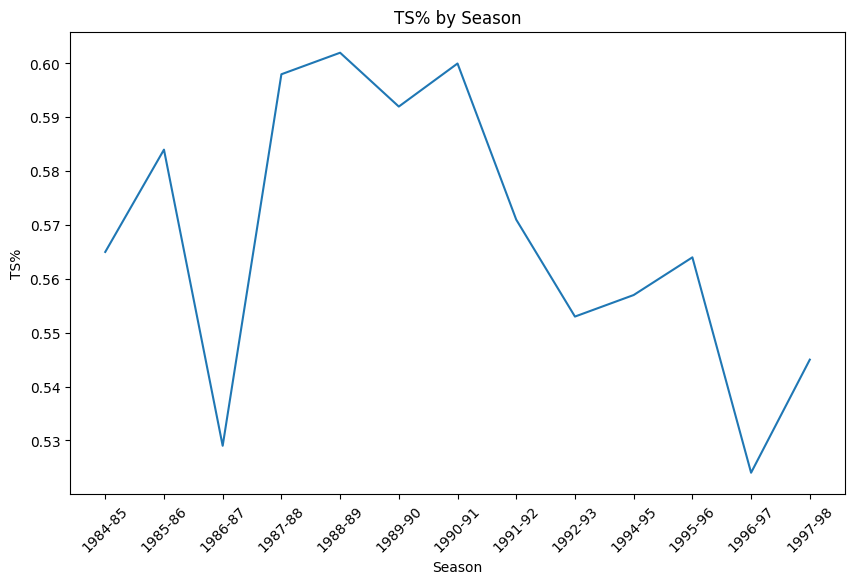

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(mj_playoffs_adv['Season'], mj_playoffs_adv['TS%'])
plt.xlabel('Season')
plt.ylabel('TS%')
plt.title('TS% by Season')
plt.xticks(rotation=45)
plt.show()
